In [1]:
cd "../../../Downloads/NewbornEEGData-20220203T094950Z-001/NewbornEEGData/"

C:\Users\Benedetta\Downloads\NewbornEEGData-20220203T094950Z-001\NewbornEEGData


In [ ]:
## provare con filtro di Jesus

In [40]:
def plot_surr(ss,dd,surrs,surrd):
    plt.rcParams['font.size'] = 19
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(1,2,1)

    f.suptitle("Threshold: {} standard deviation".format(thre))
    pool =[]
    pool_surr =[]
    import powerlaw as pwl
    for g in range(len(surrs)):
        if g ==0:
            try:
                pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1, ax = ax)
                pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1, ax =ax)
            except:
                continue
        else:
            try:
                pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1, ax = ax)
                pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1, ax =ax)
            except:
                continue

        pool += ss[g]
        pool_surr += surrs[g]


    pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
    pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate sizes', lw =3, ax = ax)  
    ax.set_xlabel(r'Avalanches sizes [$\mu V$]')
    ax.set_ylabel('pdf')
    plt.legend();

    #thre = 2
    #plt.figure()
    ax = f.add_subplot(1,2,2)

    #plt.figure(figsize=(5,5))
    pool =[]
    pool_surr =[]
    import powerlaw as pwl
    for g in range(len(surrd)):
        if g ==0:
            try:
                pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1, ax = ax)
                pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1, ax = ax)
            except:
                continue
        else:
            try:
                pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1, ax = ax)
                pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1, ax = ax)
            except:
                continue

        pool += dd[g]
        pool_surr += surrd[g]


    pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
    pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate durations', lw =3, ax = ax)  
    ax.set_xlabel('Avalanches lifetimes [s]')
    ax.set_ylabel('pdf')
    plt.legend();
    plt.tight_layout();


In [6]:
def AAFT_surrogates( original_data):
        """
        Return surrogates using the amplitude adjusted Fourier transform
        method.

        Reference: [Schreiber2000]_

        :type original_data: 2D array [index, time]
        :arg original_data: The original time series.
        :rtype: 2D array [index, time]
        :return: The surrogate time series.
        """
        #  Create sorted Gaussian reference series
        gaussian = random.randn(original_data.shape[0], original_data.shape[1])
        gaussian.sort(axis=1)

        #  Rescale data to Gaussian distribution
        ranks = original_data.argsort(axis=1).argsort(axis=1)
        rescaled_data = np.zeros(original_data.shape)

        for i in range(original_data.shape[0]):
            rescaled_data[i, :] = gaussian[i, ranks[i, :]]

        #  Phase randomize rescaled data
        phase_randomized_data = \
            correlated_noise_surrogates(rescaled_data)

        #  Rescale back to amplitude distribution of original data
        sorted_original = original_data.copy()
        sorted_original.sort(axis=1)
        #print(phase_randomized_data.shape)
        ranks = phase_randomized_data.argsort(axis=1).argsort(axis=1)

        for i in range(original_data.shape[0]):
            rescaled_data[i, :] = sorted_original[i, ranks[i, :]]

        return rescaled_data



In [7]:
def correlated_noise_surrogates( original_data):

    surrogates = np.fft.rfft(original_data, axis=1)
    original_data_fft = surrogates


    #  Get shapes
    (N, n_time) = original_data.shape
    len_phase = surrogates.shape[1]

    #  Generate random phases uniformly distributed in the
    #  interval [0, 2*Pi]
    phases = random.uniform(low=0, high=2 * np.pi, size=(N, len_phase))

    #  Add random phases uniformly distributed in the interval [0, 2*Pi]
    surrogates *= np.exp(1j * phases)

    #  Calculate IFFT and take the real part, the remaining imaginary part
    #  is due to numerical errors.
    return np.ascontiguousarray(np.real(np.fft.irfft(surrogates, n=n_time,
                                                 axis=1)))

In [8]:
from ava_functions import *

In [9]:
## rigettando anche sulla base del ppp

In [15]:
def complete_surrogate(eeg_data):
    eeg_data_surr =[]
    for g in range(eeg_data.shape[0]):
        idx = np.arange(0,len(eeg_data[g]),1)
        
        np.random.shuffle(idx)

        xsurr = eeg_data[g][idx]
        eeg_data_surr.append(xsurr)
    #print(np.asarray(eeg_data_surr).shape)
    return np.asarray(eeg_data_surr)

In [16]:
np.random.permutation(np.array([1,3,4,5,5,6,7,7,8]))

array([3, 4, 1, 6, 5, 5, 7, 7, 8])

In [17]:
np.random.shuffle(np.array([2,3,4,4]))

In [18]:
def surrogate(eeg_data):
    eeg_data_surr =[]
    for g in range(eeg_data.shape[0]):
        f = np.fft.fft(eeg_data[g])
        ab = np.abs(f)
        ph = np.angle(f)
        np.random.shuffle(ph)
        
        #ph = np.array([np.random.uniform(0,1)*2*np.pi for i in range(len(ph))])
        Xsurr = ab*(np.exp(1j*ph))
        #print(Xsurr.shape)
        xsurr = np.imag(np.fft.ifft(Xsurr,))
        eeg_data_surr.append(xsurr)
    #print(np.asarray(eeg_data_surr).shape)
    return np.asarray(eeg_data_surr)


def surrogate_shift(eeg_data):
    eeg_data_surr =[]
    for g in range(eeg_data.shape[0]):
        ii =np.random.randint(int(len(eeg_data[0])/10),int(len(eeg_data[0])*0.75))
        xsurr = np.asarray(eeg_data[g,ii:].tolist() + eeg_data[g,:ii].tolist())
        #print(xsurr.shape)
        eeg_data_surr.append(xsurr)
     #print(np.asarray(eeg_data_surr).shape)
    eeg_data_surr = np.asarray(eeg_data_surr)
    #print(np.corrcoef(eeg_data_surr[1],eeg_data_surr[2])[0,1])
    #print(np.corrcoef(eeg_data[1],eeg_data[2])[0,1])
    return np.asarray(eeg_data_surr)


In [19]:
from numpy import *

surrogate(data2)
print(data2.shape)


f = np.fft.fft(data2, axis = 1)
print(f.shape)
ab = np.abs(f)
ph = np.angle(f).T
old_ph = ph[:].T


np.random.shuffle(ph)
new_ph = ph.T
Xsurr = ab*(np.exp(1j*new_ph))
xsurr2 = np.real(np.fft.ifft(Xsurr,axis = 1))

        




plt.plot(new_ph[0], lw = 4) 
plt.plot(old_ph[0],) 

plt.xlim(0,30)

In [20]:
#os.mkdir("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data")

In [160]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *

subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne

ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
ss = []
dd = []
ss2 = []
dd2 = []

surrs =[]
surrd =[]
surrs2 =[]
surrd2 =[]

#surr2s =[]
#surr2d =[]

#surr2s2 =[]
#surr2d2 =[]



thre = 2
ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
def find_bad_channels(data, MAX_PEAK=200, MAX_PEAK_SIGMA=15, MAX_DIST_PS=4.5e-3, OFFSET=30, fmin=1, fmax=100, 
                      verbose = False):
    idx_down, idx_up = 0, data.shape[1]
    ss = np.std(data)
    
    psds, freqs = mne.time_frequency.psd_welch(mne.io.RawArray(data/1e6, info, verbose=False), fmin=fmin, fmax=fmax, n_fft=2048, n_overlap=1024/2, verbose=False)
    psds = np.log10(psds)
    
    dist = [((tmp-psds.mean(axis=0))**2).sum() for tmp in psds]
    dist = np.array(dist) / (psds**2).sum() * 1e2
    
    rej = []
    for i, ch in enumerate(ch_names):
        delta = np.abs(data[i]).max()
    
        str_rej = str()

        if delta>MAX_PEAK or dist[i]>MAX_DIST_PS:
            rej.append(ch)
            str_rej = '-> rejected'
            str_rej += ' ('
            if delta>MAX_PEAK:
                str_rej += ' peak'
                idx = np.where(np.abs(data[i])>MAX_PEAK)[0]
            
            if dist[i]>MAX_DIST_PS:
                str_rej += ' ps'
            str_rej += ')'
            
        if verbose: print(f'* {ch}: max peak = {np.round(delta, 2)} mV ({np.round(delta/ss, 2)} std); dist ps = {np.round(dist[i],3)} '+str_rej)
        
        if delta>MAX_PEAK:
            if np.max(idx)/sfreq<OFFSET:
                idx_down = np.max([np.max(idx),idx_down])
                if verbose: print(f'[*] WARNING: Peak only in the initial part - time: {np.max(idx)/sfreq} s')
            if np.min(idx)/sfreq>180-OFFSET:
                idx_up = np.min([np.min(idx),idx_up])
                if verbose: print(f'[*] WARNING: Peak only in the last part - time: {np.min(idx)/sfreq} s')
    if verbose: print('\nBad channels:', rej, '\n')
    return rej, idx_down, idx_up


filterr =False
from scipy import signal
o = 0
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    #print(nchan, nchan2)
    
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        
    
        b,a = signal.butter(2, 60, btype = 'lowpass',fs = 500)

        if filterr:
            dataa = signal.filtfilt(b,a, data, axis = -1)
            dataa2 = signal.filtfilt(b,a, data2, axis = -1)
        else:
            dataa = data
            dataa2 = data2
        
        
        

        xsurr =  AAFT_surrogates(dataa)
        xsurr2 =  AAFT_surrogates(dataa2)
        
     
        #print('doing')
        s,d = compute_avalanches(dataa.T,theta = thre, fs = 500, discretized=False,)
        s2,d2 = compute_avalanches(dataa2.T,theta =thre, fs = 500, discretized=False, )
        ss.append(s.tolist())
        dd.append((d*2).tolist())
        ss2.append(s2.tolist())
        dd2.append((d2*2).tolist())
        
        #print(type(d))
        
        s,d = compute_avalanches(xsurr.T,theta = thre, fs = 500, discretized=False, )
        s2,d2 = compute_avalanches(xsurr2.T,theta =thre, fs = 500, discretized=False)
        surrs.append(s.tolist())
        surrd.append((d*2).tolist())
        surrs2.append(s2.tolist())
        surrd2.append((d2*2).tolist())
     
        
        #np.save("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data/sur_sizes_silence1_subject{}.npy".format(subj), s)
        #np.save("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data/sur_sizes_silence2_subject{}.npy".format(subj), s2)  
        #np.save("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data/sur_durations_silence1_subject{}.npy".format(subj), d)  
        #np.save("../../../Desktop/Criticality in barrel cortex/Surrogate-avalanches-data/sur_durations_silence2_subject{}.npy".format(subj), d2)
        
        o += 1
        

-6.613818881198374
5
-10.280592498427186
7
-6.613818881198374
3
-10.280592498427188
3
-7.533664763861424
5
-8.316205578366754
4
-7.533664763861424
3
-8.316205578366754
2
-8.711323995923042
4
-15.2065381086007
4
-8.711323995923042
3
-15.2065381086007
3
-6.309373218804216
4
-6.2556218708694935
5
-6.3093732188042155
3
-6.255621870869494
2
-11.10344549478096
5
-10.492561712569913
6
-11.10344549478096
3
-10.492561712569913
3
-5.849668427333801
4
-7.185963794573775
5
-5.849668427333801
3
-7.185963794573774
2
-14.08058191520634
4
-5.061689765021327
4
-14.08058191520634
3
-5.061689765021327
2
-9.47671660600691
5
-7.343134490469814
4
-9.476716606006912
3
-7.343134490469813
3
-5.103014733390653
5
-7.962502585159153
4
-5.103014733390652
3
-7.962502585159151
2
-6.822636294335171
4
-10.001639222379264
4
-6.822636294335169
3
-10.001639222379264
3
-14.12875270117563
4
-9.208124451787857
5
-14.12875270117563
3
-9.208124451787857
3
-9.711530579936506
6
-5.804048591380199
6
-9.711530579936506
3
-5.80404

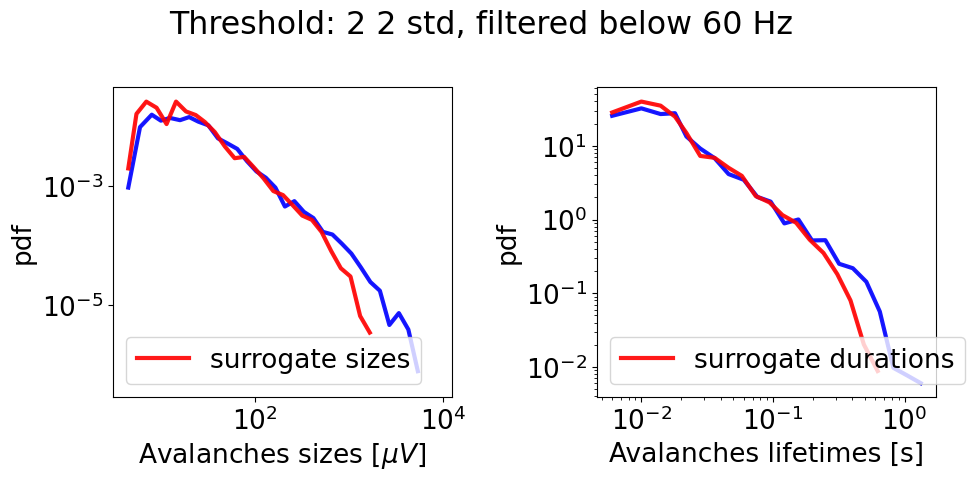

In [172]:
idx = 29

plot_surr(ss[idx:idx + 1],dd[idx:idx + 1],surrs[idx:idx +1], surrd[idx:idx+1])
#plt.xscale('linear')

In [18]:

for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    #print(nchan, nchan2)
    
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        
        

        xsurr = AAFT_surrogates(data)
        xsurr2 = AAFT_surrogates(data2)
        
        
    
        break

(0.1, 40.0)

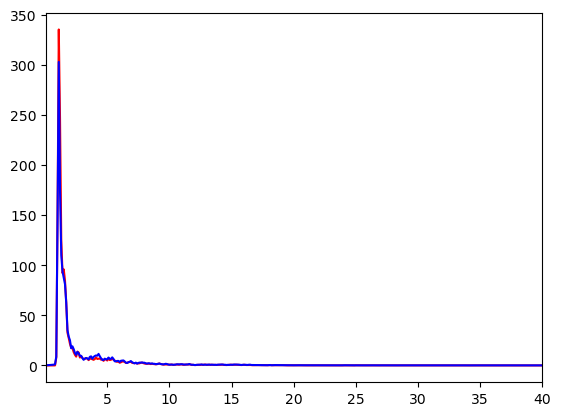

In [19]:
from scipy import signal
x,p = signal.welch(data2[2], fs = 500,nperseg = 500*10)
xsurr2 =  AAFT_surrogates(data2)

plt.plot(x,p, color = 'red')
x,p = signal.welch(xsurr2[2], fs = 500,nperseg = 500*10)
plt.plot(x,p, color = 'blue')
plt.xlim(0.1,40)
#plt.ylim(10**-6.,10**3)
#plt.xscale('log')
#plt.yscale('log')

In [36]:
avalanche(data[0][np.newaxis,:].T,0)[0]

array([65103.58807235])

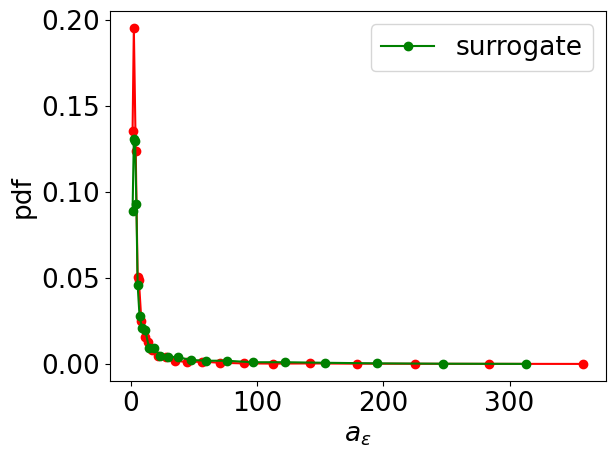

In [32]:
pwl.plot_pdf(avalanche(data2[0][np.newaxis,:].T,1)[0], color ='red',marker ='o',linear_bins=False)

pwl.plot_pdf(avalanche(xsurr[0][np.newaxis,:].T,1)[0], color ='green',marker ='o',linear_bins=False, label ='surrogate');
plt.xscale('linear')
plt.yscale('linear')
plt.legend()
plt.xlabel('$a_\epsilon$')
plt.ylabel('pdf');


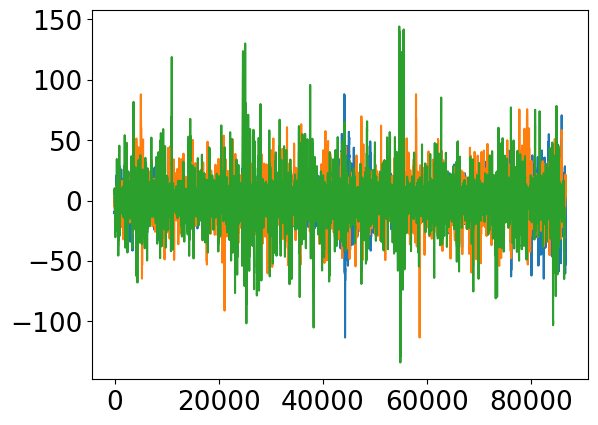

In [81]:
plt.plot(data2[0])
plt.plot(xsurr2[0])
plt.plot(xsurr2[5,100:-100])
#plt.xlim(0,100)

#plt.ylim(-40,40)

In [27]:
xsurr2.shape, data32

(10, 90967)

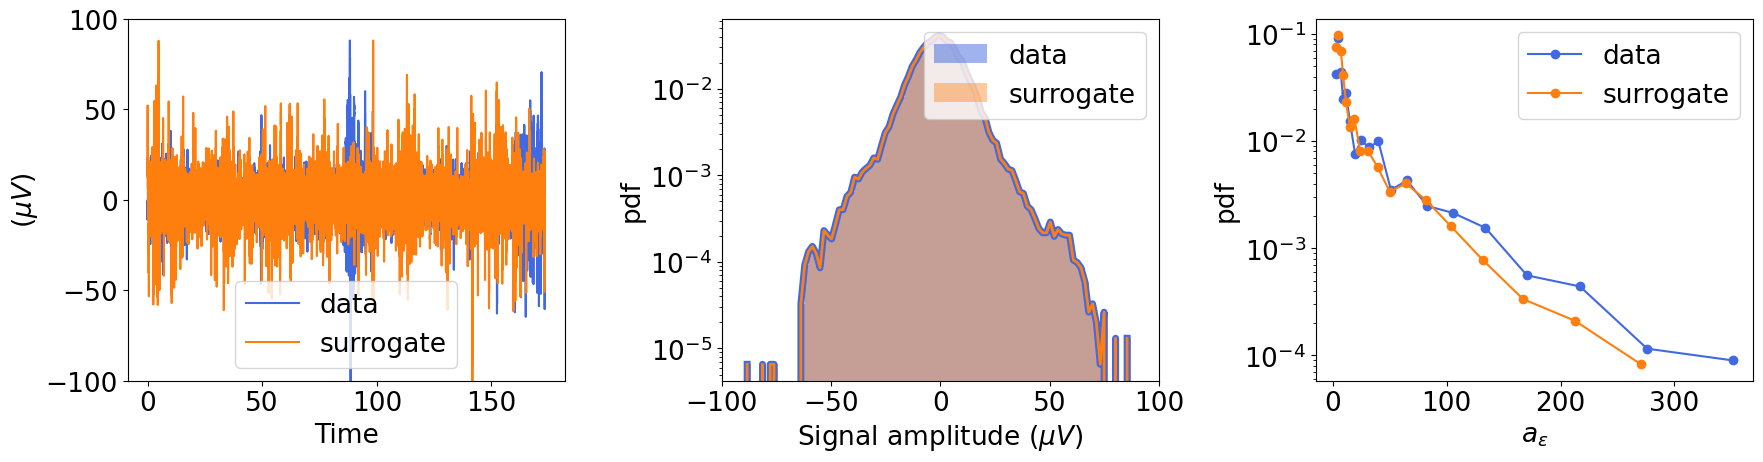

In [108]:
f =plt.figure(figsize =(18,5))
ax = f.add_subplot(1,3,1)
time = np.arange(0,len(data2[0]),1)/500
ax.plot(time,data2[0], label ='data',color ='royalblue')
ax.plot(time, xsurr2[0], label ='surrogate', color ='tab:orange')
ax.set_xlabel('Time')
ax.set_ylabel('($\mu V)$')
ax.set_ylim(-100,100)


ax.legend()
ax = f.add_subplot(1,3,2)

a,b,c = ax.hist(data2[3],bins = 100, density = True, color ='royalblue', alpha =.5,label='data');
ax.plot(b[:-1],a, color ='royalblue', lw=5)
a,b,c = ax.hist(xsurr2[3],bins = 100,density = True,color ='tab:orange', alpha = 0.4,label='surrogate');
ax.plot(b[:-1],a, color ='tab:orange', lw = 2)

ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_ylabel('pdf')
ax.set_xlabel('Signal amplitude ($\mu V)$')
ax.legend()
ax.set_xlim(-100,100)
ax = f.add_subplot(1,3,3)

pwl.plot_pdf(avalanche(data[0][np.newaxis,:].T,2)[0], color ='royalblue',marker ='o',linear_bins=False, ax =ax, label ='data')

pwl.plot_pdf(avalanche(xsurr[0][np.newaxis,:].T,2)[0], color ='tab:orange',marker ='o',linear_bins=False, label ='surrogate',ax= ax);
ax.set_xscale('linear')
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('$a_\epsilon$')
ax.set_ylabel('pdf');
#plt.xscale('log')
plt.tight_layout();

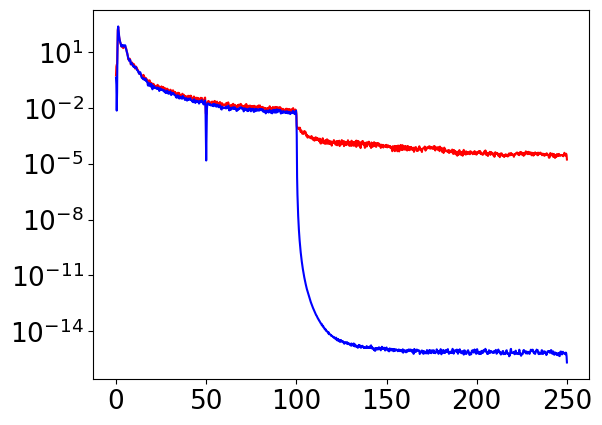

In [84]:
from scipy import signal
x,p = signal.welch(xsurr[3], fs = 500,nperseg = 500*5)
plt.plot(x,p, color = 'red')
x,p = signal.welch(data[3], fs = 500,nperseg = 500*5)
plt.plot(x,p, color = 'blue')
#plt.xlim(0.1,80)
#plt.ylim(10**-6.,10**3)
#plt.xscale('log')
plt.yscale('log')

(40000.0, 50000.0)

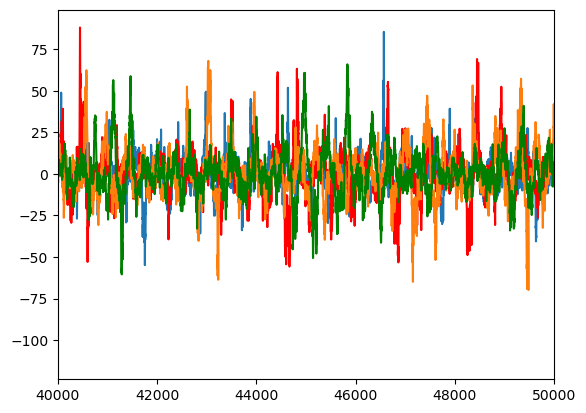

In [44]:
#plt.plot(data2[8])
plt.plot(xsurr2[8])
plt.plot(xsurr2[0], color ='red')

#plt.plot(data2[8])
plt.plot(xsurr2[2])
plt.plot(xsurr2[3], color ='green')

plt.xlim(500*80,500*100)
#plt.ylim(-50,50)

In [ ]:
##np.imag or np.real??

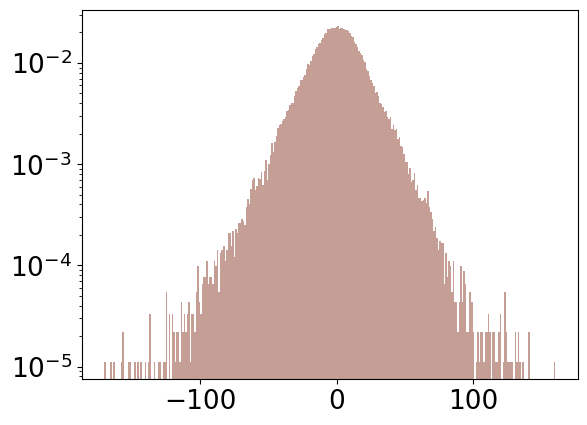

In [103]:
plt.hist(data2[0], bins = 300, density = True,  color ='royalblue', alpha =.5);
plt.hist(xsurr2[0], bins = 300,density = True,color ='tab:orange', alpha = 0.4);
plt.yscale('log')
#plt.xscale('log')

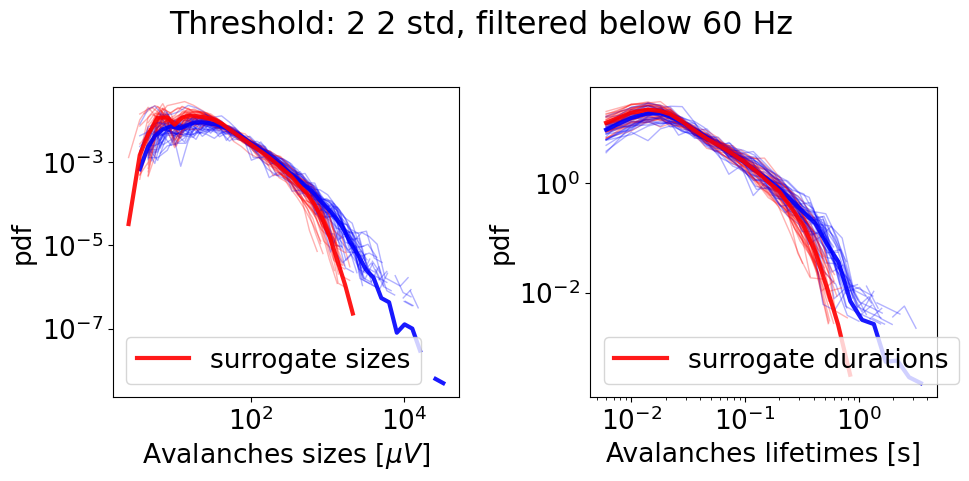

In [104]:
plot_surr(ss,dd,surrs,surrd) ## qui no powerlaw

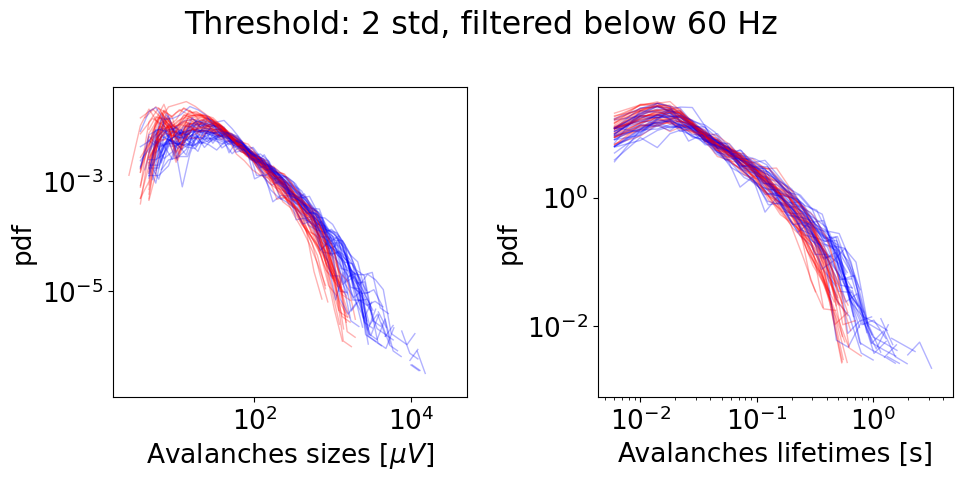

In [105]:
# thre = 1
plt.rcParams['font.size'] = 19
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,2,1)

f.suptitle("Threshold: {} std, filtered below 60 Hz".format(thre))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==20:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1, ax =ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1, ax =ax)
        except:
            continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    

#pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax, label ='original data')    
#pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate', lw =3, ax = ax)  
ax.set_xlabel(r'Avalanches sizes [$\mu V$]')
ax.set_ylabel('pdf')
#plt.legend(fontsize = 17);

#thre = 2
#plt.figure()
ax = f.add_subplot(1,2,2)

#plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==20:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1, ax = ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1, ax = ax)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]


#pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax, label ='original data')    
#pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate', lw =3, ax = ax)  
ax.set_xlabel('Avalanches lifetimes [s]')
ax.set_ylabel('pdf')

#plt.legend(fontsize = 17);
plt.tight_layout();
## bo....
#plt.savefig('../

In [68]:
len(ss)

32

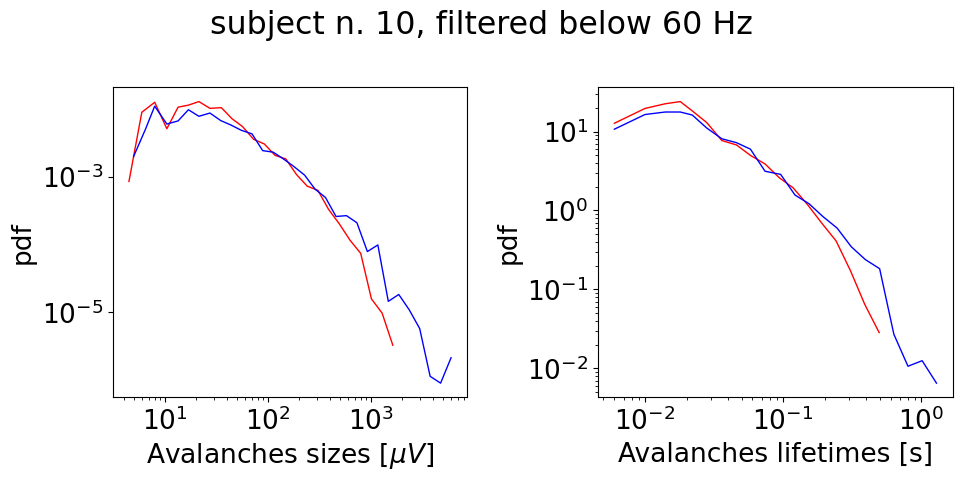

In [106]:
# thre = 1
plt.rcParams['font.size'] = 19
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,2,1)
sub =10
f.suptitle("subject n. {}, filtered below 60 Hz".format(sub))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==sub:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =1, lw = 1, ax = ax,label ='surrogate')
            pwl.plot_pdf(ss[g], color ='blue', alpha = 1,lw = 1, ax =ax,label ='original data')
        except:
            continue
    #else:
    #    try:
    #        pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1, ax = ax)
    #        pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1, ax =ax)
    #    except:
    #        continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    

#pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax, label ='original data')    
#pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate', lw =3, ax = ax)  
ax.set_xlabel(r'Avalanches sizes [$\mu V$]')
ax.set_ylabel('pdf')
#plt.legend(fontsize = 17);

#thre = 2
#plt.figure()
ax = f.add_subplot(1,2,2)

#plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==sub:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =1, lw = 1, ax = ax, label = 'surrogate')
            pwl.plot_pdf(dd[g], color ='blue', alpha = 1,lw = 1, ax = ax,label ='original data')
        except:
            continue
    #else:
    #    try:
     #       pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1, ax = ax)
      #      pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1, ax = ax)
       # except:
        #    continue
        
    pool += dd[g]
    pool_surr += surrd[g]


#pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax, label ='original data')    
#pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate', lw =3, ax = ax)  
ax.set_xlabel('Avalanches lifetimes [s]')
ax.set_ylabel('pdf')

#plt.legend(fontsize = 17);
plt.tight_layout();
## bo....
#plt.savefig('../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/surrogate avalanches.png', bbox_inches ='tight')


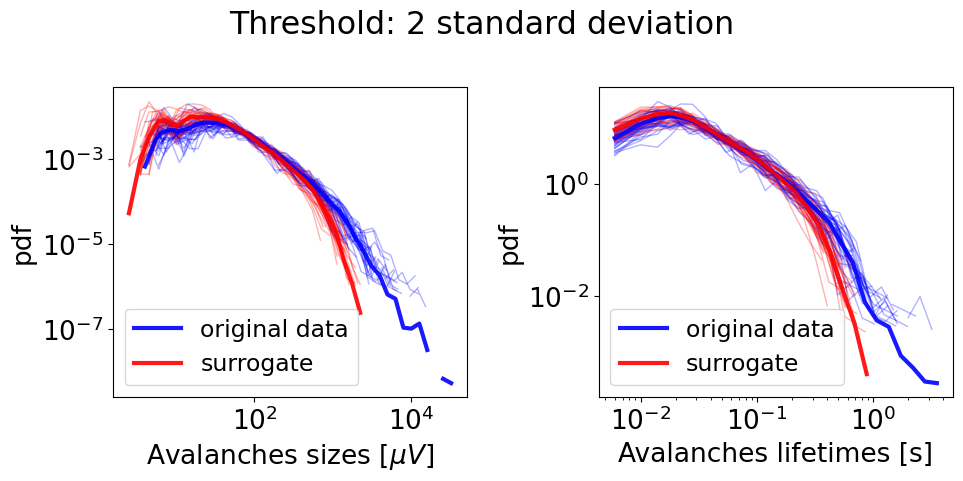

In [48]:
# thre = 1
plt.rcParams['font.size'] = 19
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,2,1)

f.suptitle("Threshold: {} standard deviation".format(thre))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==0:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1, ax =ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1, ax =ax)
        except:
            continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax, label ='original data')    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate', lw =3, ax = ax)  
ax.set_xlabel(r'Avalanches sizes [$\mu V$]')
ax.set_ylabel('pdf')
plt.legend(fontsize = 17);

#thre = 2
#plt.figure()
ax = f.add_subplot(1,2,2)

#plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==0:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1, ax = ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1, ax = ax)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]


pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax, label ='original data')    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate', lw =3, ax = ax)  
ax.set_xlabel('Avalanches lifetimes [s]')
ax.set_ylabel('pdf')

plt.legend(fontsize = 17);
plt.tight_layout();
## bo....
plt.savefig('../../../Desktop/Criticality in barrel cortex/EEG avalanche analysis/surrogate avalanches.png', bbox_inches ='tight')


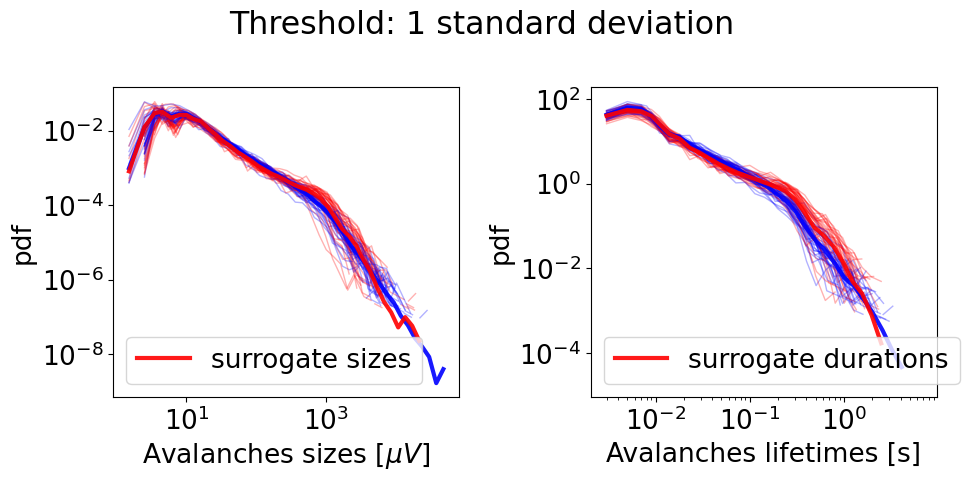

In [40]:
# thre = 1
plt.rcParams['font.size'] = 19
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,2,1)

f.suptitle("Threshold: {} standard deviation".format(thre))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==0:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1, ax =ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1, ax =ax)
        except:
            continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate sizes', lw =3, ax = ax)  
ax.set_xlabel(r'Avalanches sizes [$\mu V$]')
ax.set_ylabel('pdf')
plt.legend();

#thre = 2
#plt.figure()
ax = f.add_subplot(1,2,2)

#plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==0:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1, ax = ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1, ax = ax)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]


pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate durations', lw =3, ax = ax)  
ax.set_xlabel('Avalanches lifetimes [s]')
ax.set_ylabel('pdf')

plt.legend();
plt.tight_layout();


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.5099562242257532 +- 0.16180764798142833
Fit from of average size given duration points: delta =  1.0856258340371987 +- 0.017767272895488895


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_16496\880497259.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


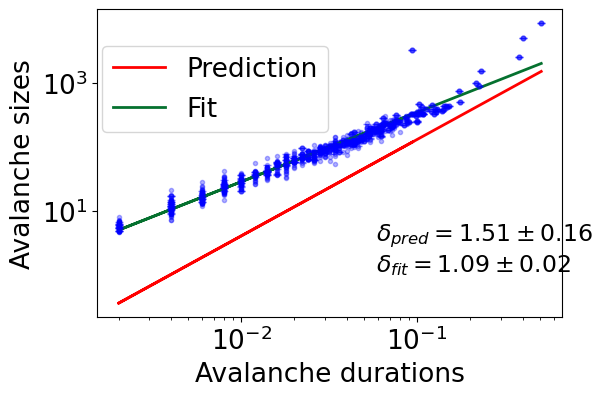

In [34]:
scaling(surrs[0], surrd[0], plotto =True);

In [99]:
def plot_surr(ss,dd,surrs,surrd):
    plt.rcParams['font.size'] = 19
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(1,2,1)

    f.suptitle("Threshold: {} 2 std, filtered below 60 Hz".format(thre))
    pool =[]
    pool_surr =[]
    import powerlaw as pwl
    for g in range(len(surrs)):
        if g ==0:
            try:
                pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1, ax = ax)
                pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1, ax =ax)
            except:
                continue
        else:
            try:
                pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1, ax = ax)
                pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1, ax =ax)
            except:
                continue

        pool += ss[g]
        pool_surr += surrs[g]


    pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
    pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate sizes', lw =3, ax = ax)  
    ax.set_xlabel(r'Avalanches sizes [$\mu V$]')
    ax.set_ylabel('pdf')
    plt.legend();

    #thre = 2
    #plt.figure()
    ax = f.add_subplot(1,2,2)

    #plt.figure(figsize=(5,5))
    pool =[]
    pool_surr =[]
    import powerlaw as pwl
    for g in range(len(surrd)):
        if g ==0:
            try:
                pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1, ax = ax)
                pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1, ax = ax)
            except:
                continue
        else:
            try:
                pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1, ax = ax)
                pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1, ax = ax)
            except:
                continue

        pool += dd[g]
        pool_surr += surrd[g]


    pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
    pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate durations', lw =3, ax = ax)  
    ax.set_xlabel('Avalanches lifetimes [s]')
    ax.set_ylabel('pdf')
    plt.legend();
    plt.tight_layout();


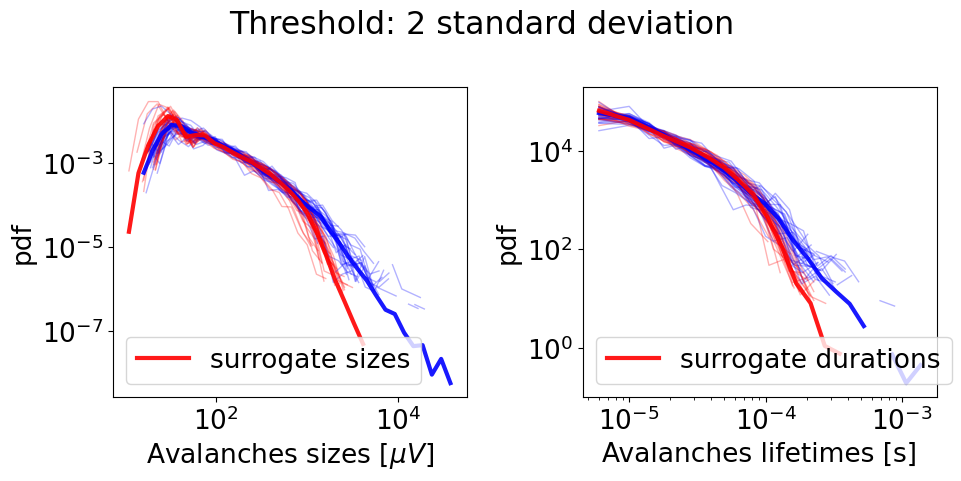

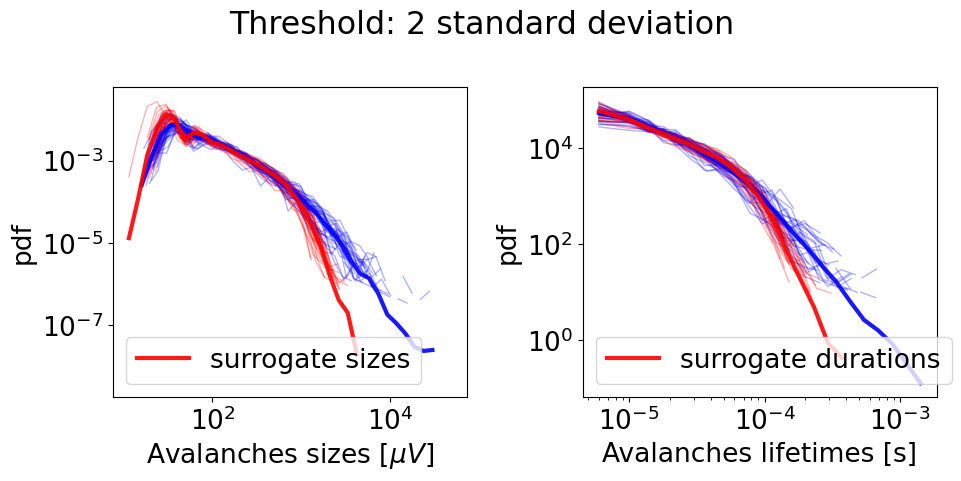

In [29]:
plot_surr(ss,dd,surrs, surrd)
plot_surr(ss2,dd2,surrs2, surrd2)

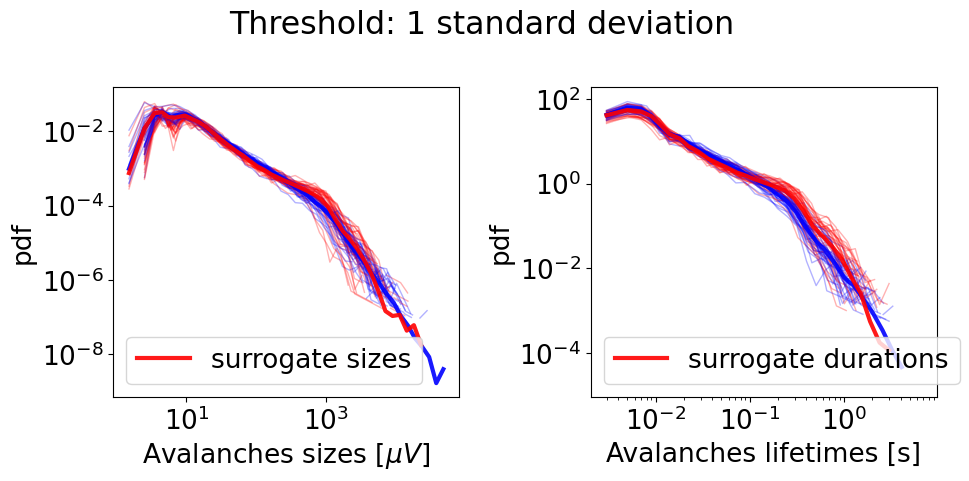

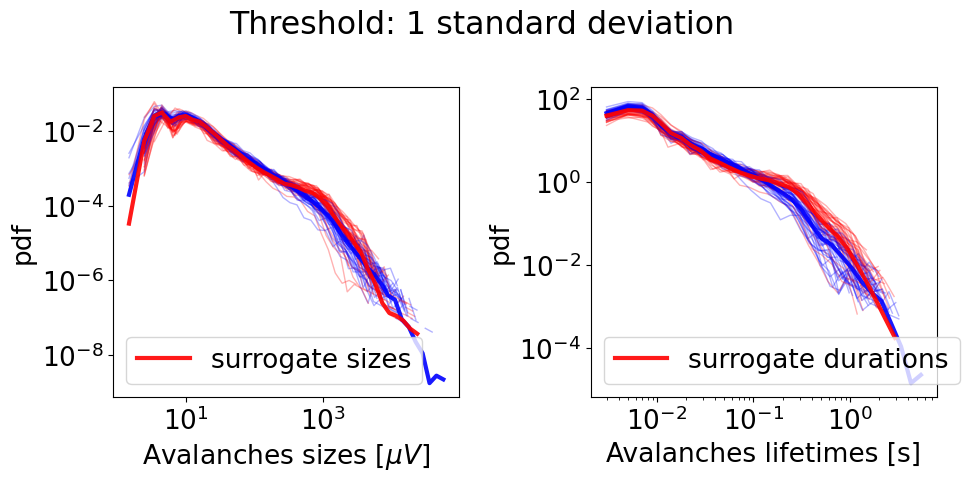

In [24]:
plot_surr(ss,dd,surrs, surrd)
plot_surr(ss2,dd2,surrs2, surrd2)

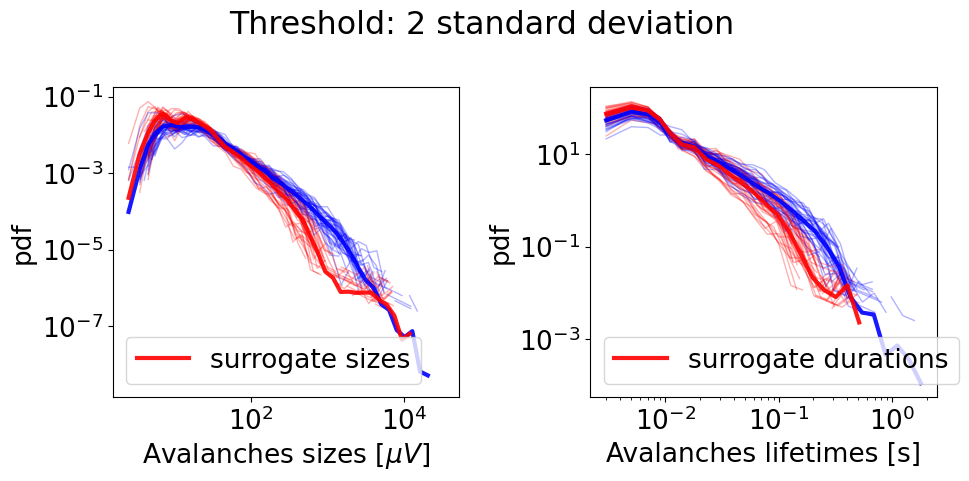

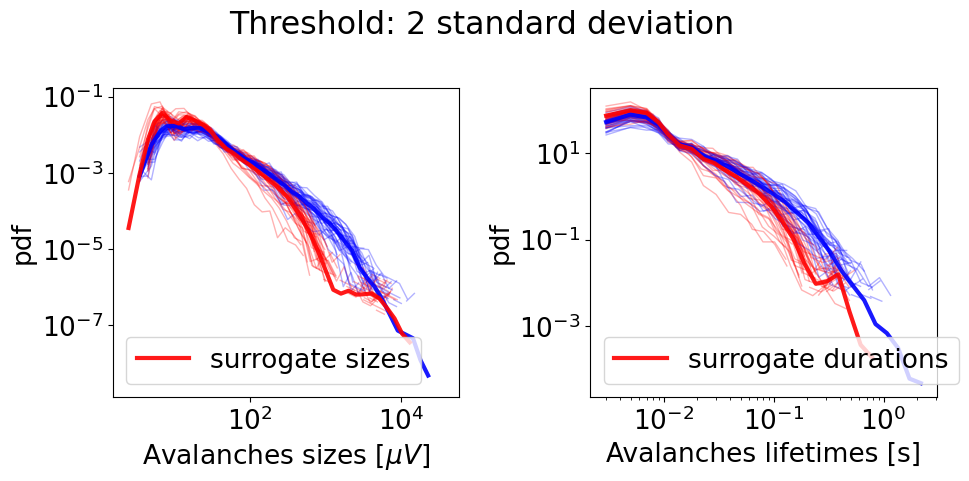

In [33]:
plot_surr(ss,dd,surrs, surrd)
plot_surr(ss2,dd2,surrs2, surrd2)

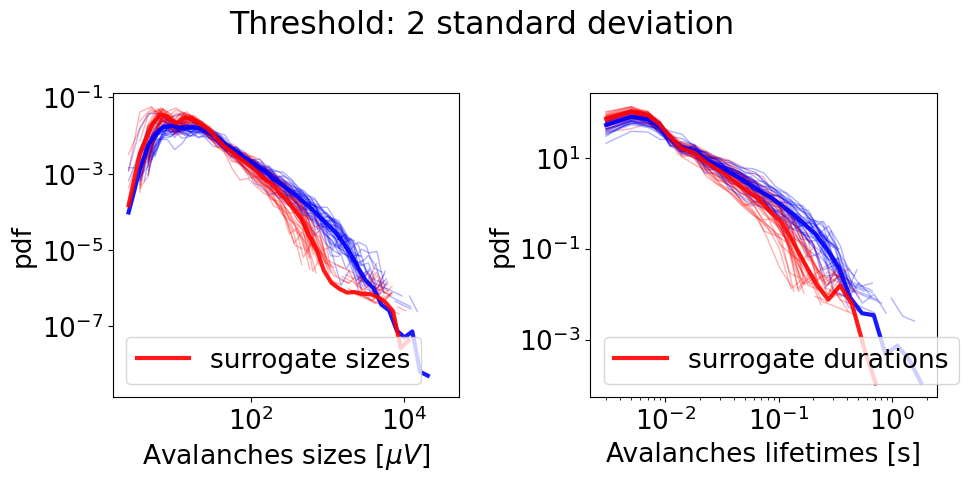

In [15]:
# thre = 1
plt.rcParams['font.size'] = 19
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,2,1)

f.suptitle("Threshold: {} standard deviation".format(thre))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==0:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1, ax =ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1, ax =ax)
        except:
            continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate sizes', lw =3, ax = ax)  
ax.set_xlabel(r'Avalanches sizes [$\mu V$]')
ax.set_ylabel('pdf')
plt.legend();

#thre = 2
#plt.figure()
ax = f.add_subplot(1,2,2)

#plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==0:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1, ax = ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1, ax = ax)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]


pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate durations', lw =3, ax = ax)  
ax.set_xlabel('Avalanches lifetimes [s]')
ax.set_ylabel('pdf')
plt.legend();
plt.tight_layout();


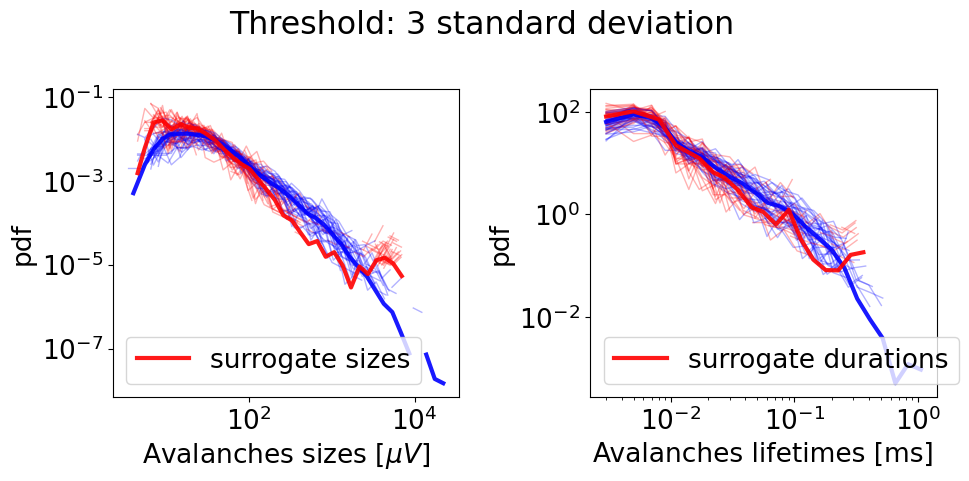

In [42]:

plt.rcParams['font.size'] = 19
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,2,1)

f.suptitle("Threshold: {} standard deviation".format(thre))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==0:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1, ax =ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1, ax =ax)
        except:
            continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate sizes', lw =3, ax = ax)  
ax.set_xlabel(r'Avalanches sizes [$\mu V$]')
ax.set_ylabel('pdf')
plt.legend();

#thre = 2
#plt.figure()
ax = f.add_subplot(1,2,2)

#plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==0:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1, ax = ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1, ax = ax)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]


pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate durations', lw =3, ax = ax)  
ax.set_xlabel('Avalanches lifetimes [ms]')
ax.set_ylabel('pdf')

plt.legend();
plt.tight_layout();


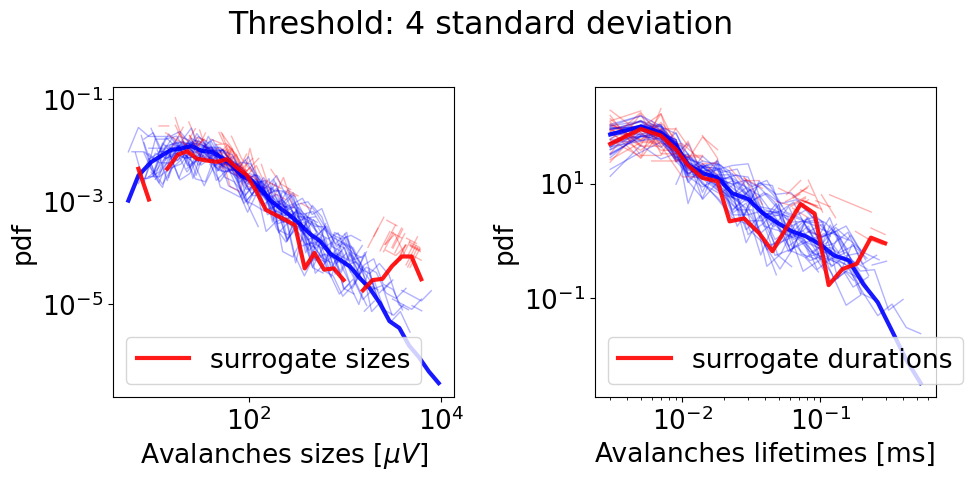

In [44]:
# thre = 1
plt.rcParams['font.size'] = 19
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,2,1)

f.suptitle("Threshold: {} standard deviation".format(thre))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrs)):
    if g ==0:
        try:
            pwl.plot_pdf(surrs[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha = .3,lw = 1, ax =ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrs[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(ss[g], color ='blue', alpha =.3,lw = 1, ax =ax)
        except:
            continue
        
    pool += ss[g]
    pool_surr += surrs[g]
    

pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate sizes', lw =3, ax = ax)  
ax.set_xlabel(r'Avalanches sizes [$\mu V$]')
ax.set_ylabel('pdf')
plt.legend();

#thre = 2
#plt.figure()
ax = f.add_subplot(1,2,2)

#plt.figure(figsize=(5,5))
pool =[]
pool_surr =[]
import powerlaw as pwl
for g in range(len(surrd)):
    if g ==0:
        try:
            pwl.plot_pdf(surrd[g], color ='red', alpha =.3, lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha = .3,lw = 1, ax = ax)
        except:
            continue
    else:
        try:
            pwl.plot_pdf(surrd[g], color ='red',alpha =.3,lw = 1, ax = ax)
            pwl.plot_pdf(dd[g], color ='blue', alpha =.3,lw = 1, ax = ax)
        except:
            continue
        
    pool += dd[g]
    pool_surr += surrd[g]


pwl.plot_pdf(pool, color ='blue', alpha =.9, lw = 3, ax = ax)    
pwl.plot_pdf(pool_surr, color ='red', alpha =.9, label ='surrogate durations', lw =3, ax = ax)  
ax.set_xlabel('Avalanches lifetimes [ms]')
ax.set_ylabel('pdf')

plt.legend();
plt.tight_layout();


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

### Avalanche sizes and durations + $<s(t)>$ vs T exponents

In [107]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
#import scipy.signal as ss
import scipy.io
#from dfa_functions import *

overlap =0.5
bands = [[1,3],[4,8],[8,13],[14,30],[31,60]]
labels = ['band-1', 'band-2', 'band-3', 'band-4', 'band-5']
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
print(len(subjs))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne

hh = 14
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
alphas1 = []
taus1 =[]

deltas1 = []
deltas2 = []


alphas2 = []
taus2 =[]



alphas1_surr = []
taus1_surr =[]

deltas1_surr = []
deltas2_surr = []


alphas2_surr = []
taus2_surr =[]

good_sub = []


ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
o = 0
for i, subj in enumerate(subjs):
    print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    print(nchan, nchan2)
    if nchan >= 5 and nchan2 >=5 and subj != 53:
   
        b,a = signal.butter(2, 60, btype = 'lowpass',fs = 500)

        if filterr:
            dataa = signal.filtfilt(b,a, data, axis = -1)
            dataa2 = signal.filtfilt(b,a, data2, axis = -1)
        else:
            dataa = data
            dataa2 = data2
        
        print('doing')
        s,d = avalanche(dataa.T,2)
        s2,d2 = avalanche(dataa2.T,2)
        #ss.append(s)
        #dd.append(d)
        #ss2.append(s2)
        #dd2.append(d2)
        
            
        v = scaling(s,d*0.002, plotto = False)

        deltas1.append(v[2])

        good_sub.append(subj)
        data = s
        fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        alphas1.append(exp)
        
        data = d*0.002
        fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        taus1.append(exp)

        data = s2
        fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        alphas2.append(exp)
        
        data = d2*0.002
        fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        taus2.append(exp)
        
        
        v = scaling(s2,d2*0.002, plotto = False)
        deltas2.append(v[2])
        
        
        
        
        s,d = avalanche(AAFT_surrogates(dataa).T,2)
        s2,d2 = avalanche(AAFT_surrogates(dataa2).T,2)
        #ss.append(s)
        #dd.append(d)
        #ss2.append(s2)
        #dd2.append(d2)
        
            
        v = scaling(s,d*0.002, plotto = False)

        deltas1_surr.append(v[2])

        good_sub.append(subj)
        data = s
        fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        alphas1_surr.append(exp)
        
        data = d*0.002
        fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        taus1_surr.append(exp)

        data = s2
        fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        alphas2_surr.append(exp)
        
        data = d2*0.002
        fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
        exp = fit.power_law.alpha
        taus2_surr.append(exp)
        
        
        v = scaling(s2,d2*0.002, plotto = False)
        deltas2_surr.append(v[2])
        
        

        o += 1
        

49


########## SUBJ 5 (1/49)##########
7 10
doing
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.6725570931615168 +- 0.134604894733449
Fit from of average size given duration points: delta =  1.1236385034206635 +- 0.014461408153222957
Calculating best minimal value for power law fit


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_7316\880497259.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.2156981658805266 +- 0.09564850829377167
Fit from of average size given duration points: delta =  1.157255490844319 +- 0.012401154938064218
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.6210819314930256 +- 0.10342643531851682
Fit from of average size given duration points: delta =  1.090485857842373 +- 0.007273230161971781
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal val

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3933625930437175 +- 0.09101208743315212
Fit from of average size given duration points: delta =  1.1528022521268209 +- 0.011518166214439074
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.7719208351832538 +- 0.09943973767124052
Fit from of average size given duration points: delta =  1.0755257740465591 +- 0.0066202875388058045
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.1640690757231384 +- 0.033802950806320634
Fit from of average size give

Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.6893951801928995 +- 0.1277635734830168
Fit from of average size given duration points: delta =  1.1468351848474934 +- 0.011820728353157653
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  2.523243969244529 +- 0.13064894231172924
Fit from of average size given duration points: delta =  1.0896620099154606 +- 0.006059367998124038
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.4781452756960096 +- 0.08477566106580314
Fit from of average size given duration points: delta =  1.084057782236711 +- 0.00

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.8070416398969404 +- 0.10488654142863096
Fit from of average size given duration points: delta =  1.0916095371658017 +- 0.0073011344705416195
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.6942531839936688 +- 0.09040545978925783
Fit from of average size given duration points: delta =  1.094243787285465 +- 0.006240015645666788


########## SUBJ 47 (23/49)##########
9 7
doing
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3992239970836826 +- 0.

Prediction from crackling noise relation: delta =  1.870065855971502 +- 0.09650943733985408
Fit from of average size given duration points: delta =  1.0962876443979421 +- 0.007239828020561049
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.0901417223937464 +- 0.04887630508749614
Fit from of average size given duration points: delta =  1.0661200908266464 +- 0.006010897595645979


########## SUBJ 60 (30/49)##########
10 0


########## SUBJ 62 (31/49)##########
7 9
doing
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.2407832094941968 +- 0.085232513374272
Fit from of average size given duration

Prediction from crackling noise relation: delta =  1.9872195163920305 +- 0.1503423812962201
Fit from of average size given duration points: delta =  1.137980289955944 +- 0.00809483328151604
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3170244741601669 +- 0.07416182637034847
Fit from of average size given duration points: delta =  1.0999932699401573 +- 0.006389979882898954


########## SUBJ 14 (39/49)##########
5 10
doing
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.100044912783648 +- 0.06395394696324155
Fit from of average size given duration points: delta =  1.0621640445098208 +- 0.01

Prediction from crackling noise relation: delta =  1.1386829575910422 +- 0.0476026843760012
Fit from of average size given duration points: delta =  1.094270613412571 +- 0.007298268188908551
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3925903954377172 +- 0.06596565364139924
Fit from of average size given duration points: delta =  1.0678186593792738 +- 0.00615270328509676


########## SUBJ 64 (48/49)##########
9 10
doing
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.76954549161809 +- 0.13662266474146734
Fit from of average size given duration points: delta =  1.134400494434891 +- 0.0111

In [149]:
dd

[[0.47200000000000003,
  0.15600000000000003,
  0.06000000000000005,
  0.07600000000000007,
  0.10400000000000009,
  0.1120000000000001,
  0.10400000000000009,
  0.1479999999999997,
  0.2840000000000007,
  0.016000000000000014,
  0.19200000000000017,
  0.02400000000000002,
  0.1120000000000001,
  0.2560000000000002,
  0.3719999999999999,
  0.20400000000000063,
  0.15999999999999837,
  0.120000000000001,
  0.30400000000000027,
  0.019999999999999574,
  0.03599999999999959,
  0.03599999999999959,
  0.379999999999999,
  0.18400000000000105,
  0.28800000000000026,
  0.1999999999999993,
  0.20000000000000107,
  0.02800000000000047,
  0.07599999999999874,
  0.120000000000001,
  0.15200000000000102,
  0.1479999999999997,
  0.06799999999999962,
  0.04800000000000004,
  0.03999999999999915,
  0.11199999999999832,
  0.06800000000000139,
  0.03999999999999915,
  0.06400000000000006,
  0.05600000000000094,
  0.14399999999999835,
  0.21600000000000108,
  0.1039999999999992,
  0.1479999999999997,
  

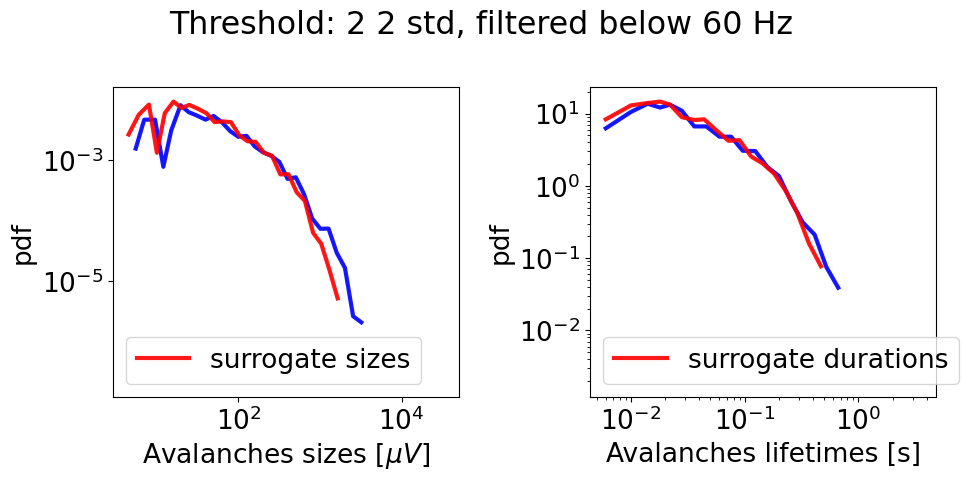

In [159]:
idx = 23
plot_surr(ss[idx:idx + 1],dd[idx:idx + 1],surrs[idx:idx +1], surrd[idx:idx+1])

In [14]:
os.listdir();

In [108]:
### ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp

In [122]:

subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

In [123]:
sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


In [124]:
list(map(len, [sub_fren, sub_span, sub_en]))

[12, 9, 11]

In [125]:
good_sub = np.asarray(good_sub)
alphas1 = np.asarray(alphas1)
alphas2 = np.asarray(alphas2)
taus1 = np.asarray(taus1)
taus2 = np.asarray(taus2)
deltas1 = np.asarray(deltas1)
deltas2 = np.asarray(deltas2)
#index. = np.where()

In [141]:
good_sub = np.asarray(good_sub)
alphas1_surr = np.asarray(alphas1_surr)
alphas2_surr = np.asarray(alphas2_surr)
taus1_surr = np.asarray(taus1_surr)
taus2_surr = np.asarray(taus2_surr)
deltas1_surr = np.asarray(deltas1_surr)
deltas2_surr = np.asarray(deltas2_surr)
#index. = np.where()

In [134]:
good_sub = np.array([ 5,  6,  9, 11, 12, 16, 17, 18, 19, 23, 30, 33, 35, 37, 40, 45, 47,
       49, 52, 56, 58, 62, 66, 67, 68, 71, 14, 22, 27, 41, 46, 64])

In [126]:
h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

[44, 46, 26, 4, 58, 6, 8, 32, 10, 14, 54, 38]


In [119]:
ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

In [22]:
ll

array([22, 23, 13,  2, 29,  3,  4, 16,  5,  7, 27, 19], dtype=int64)

In [118]:
import scipy.stats as stats 

def funct(sub, vec1, vec2, option ='greater'):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = option) )
    

In [97]:
## TO DO
## dire a jesus di tetst 
## e branc param
## faccio t test on correaltions
## surrogate data set
## destroy correlations and then compute avalanches as a surrogate (shuffle tha phasess)
## give to Jesus the surrogate data
## give Lombardi signalfiltered in the theta banda

In [135]:
funct2(sub_fren, alphas1).mean(),funct2(sub_fren, alphas2).mean()

(1.8887951296822336, 1.8485696349099052)

In [142]:
funct(sub_fren,alphas1_surr,alphas2_surr)
funct(sub_en,alphas1_surr,alphas2_surr)
funct(sub_span,alphas1_surr,alphas2_surr)

TtestResult(statistic=-0.0662478268717384, pvalue=0.5258153751192151, df=11)
TtestResult(statistic=-4.021070251069463, pvalue=0.9987828744050922, df=10)
TtestResult(statistic=1.0006270144724794, pvalue=0.17315408503642477, df=8)


In [136]:
funct(sub_fren,alphas1,alphas2)
funct(sub_en,alphas1,alphas2)
funct(sub_span,alphas1,alphas2)

TtestResult(statistic=1.103624272038109, pvalue=0.1466570193990979, df=11)
TtestResult(statistic=1.1245269457413638, pvalue=0.14352866729120467, df=10)
TtestResult(statistic=0.23187837151921628, pvalue=0.41122691154249846, df=8)


In [137]:
funct(sub_fren,taus1,taus2)
funct(sub_en,taus1,taus2)
funct(sub_span,taus1,taus2)

TtestResult(statistic=0.41151932294057425, pvalue=0.3442980082908514, df=11)
TtestResult(statistic=-0.4096539693981233, pvalue=0.6546514515003334, df=10)
TtestResult(statistic=-0.2828441240440371, pvalue=0.6077615543431107, df=8)


In [138]:
funct(sub_fren,deltas1,deltas2, 'less')
funct(sub_en,deltas1,deltas2, 'less')
funct(sub_span,deltas1,deltas2, 'less')

TtestResult(statistic=-2.139639109270237, pvalue=0.02782008920920005, df=11)
TtestResult(statistic=-2.156243971893192, pvalue=0.028233199622782937, df=10)
TtestResult(statistic=-1.2320095690999067, pvalue=0.12646313004539594, df=8)


In [30]:
# Importing library 
import scipy.stats as stats 
alphas1 =np.asarray(alphas1)
alphas2 =np.asarray(alphas2)

stats.ttest_rel(alphas1, alphas2,alternative = 'greater') 


TtestResult(statistic=1.7072676433503748, pvalue=0.048885502831148446, df=31)

In [32]:
# Importing library 
import scipy.stats as stats 
alphas1 =np.asarray(alphas1)
alphas2 =np.asarray(alphas2)

stats.ttest_rel(deltas1, deltas2,alternative = 'less') 

TtestResult(statistic=-3.06359372422484, pvalue=0.0022491829534972787, df=31)

In [35]:
# Importing library 
import scipy.stats as stats 
alphas1 =np.asarray(alphas1)
alphas2 =np.asarray(alphas2)

stats.ttest_rel(taus1, taus2,alternative = 'greater') 

TtestResult(statistic=-1.118319191046327, pvalue=0.8639888790049307, df=31)

In [38]:
# Importing library 
import scipy.stats as stats 
taus1 =np.asarray(taus1)
taus2 =np.asarray(taus2)

stats.ttest_rel(taus1, taus2,) 

TtestResult(statistic=-1.015727777328112, pvalue=0.3173776932365956, df=32)

In [31]:
stats.ttest_rel(deltas1, deltas2,alternative = 'less') 

TtestResult(statistic=-2.6655888161610273, pvalue=0.005972661835473558, df=32)

In [39]:
plt.rcParams['font.size'] = 17

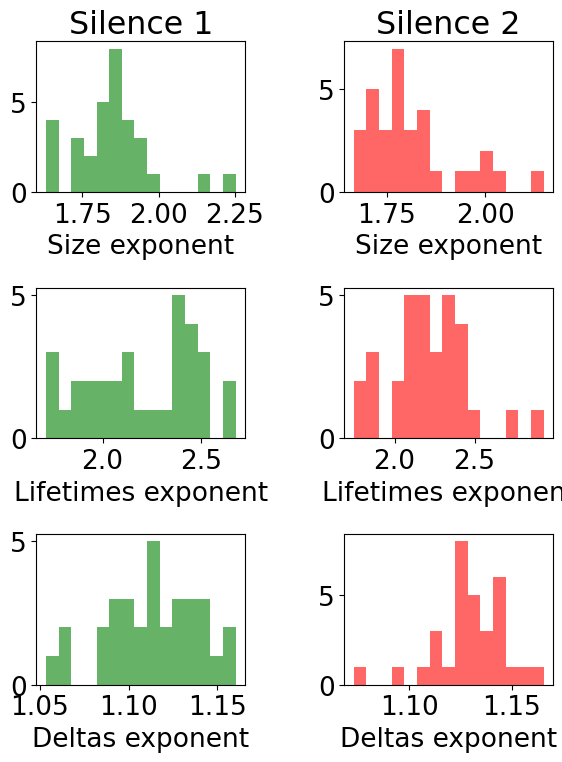

In [143]:
fig = plt.figure(figsize = (6,8))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)


ax1.hist(alphas1, color = 'green', alpha = .6, bins = 15)
ax2.hist(alphas2, color = 'red', alpha = .6, bins = 15)
ax1.set_title('Silence 1')
ax2.set_title('Silence 2')

ax1.set_xlabel('Size exponent')
ax2.set_xlabel('Size exponent')


#ax3.set_title('Silence 1')
#ax4.set_title('Silence 2')
ax3.hist(taus1, color = 'green', alpha = .6, bins = 15)
ax4.hist(taus2, color = 'red', alpha = .6, bins = 15)
ax3.set_xlabel('Lifetimes exponent')
ax4.set_xlabel('Lifetimes exponent')


#ax5.set_title('Silence 1')
#ax6.set_title('Silence 2')
ax5.hist(deltas1, color = 'green', alpha = .6, bins = 15)
ax6.hist(deltas2, color = 'red', alpha = .6, bins = 15)
ax5.set_xlabel('Deltas exponent');
ax6.set_xlabel('Deltas exponent');
plt.tight_layout();


# Intertimes distribution

In [77]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *

overlap =0.5
bands = [[1,3],[4,8],[8,13],[14,30],[31,60]]
labels = ['band-1', 'band-2', 'band-3', 'band-4', 'band-5']
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
print(len(subjs))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne

hh = 14
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
intert1 = []
intert2 =[]

ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)

o = 0
for i, subj in enumerate(subjs):
    print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    print(nchan, nchan2)
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        
        
        print('doing')
        d = intertimes(data.T,2)
        d2 = intertimes(data2.T,2)
        
        intert1.append(d*0.002*1000)
        
        intert2.append(d2*0.002*1000)
        o += 1
        

49


########## SUBJ 5 (1/49)##########
7 10
doing


########## SUBJ 6 (2/49)##########
10 10
doing


########## SUBJ 9 (3/49)##########
9 10
doing


########## SUBJ 11 (4/49)##########
10 10
doing


########## SUBJ 12 (5/49)##########
10 7
doing


########## SUBJ 13 (6/49)##########
0 8


########## SUBJ 16 (7/49)##########
9 10
doing


########## SUBJ 17 (8/49)##########
10 10
doing


########## SUBJ 18 (9/49)##########
8 9
doing


########## SUBJ 19 (10/49)##########
9 10
doing


########## SUBJ 21 (11/49)##########
9 1


########## SUBJ 23 (12/49)##########
8 10
doing


########## SUBJ 24 (13/49)##########
0 10


########## SUBJ 25 (14/49)##########
2 10


########## SUBJ 30 (15/49)##########
10 8
doing


########## SUBJ 33 (16/49)##########
7 9
doing


########## SUBJ 34 (17/49)##########
0 10


########## SUBJ 35 (18/49)##########
9 10
doing


########## SUBJ 37 (19/49)##########
10 10
doing


########## SUBJ 39 (20/49)##########
4 9


########## SUBJ 40 (21/49)##########
6 8
doi

In [69]:
len(intert1[0])

692

In [116]:
### ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    

[44, 46, 26, 4, 58, 6, 8, 32, 10, 14, 54, 38]


In [81]:
intert1 = np.asarray(intert1)
intert2 = np.asarray(intert2)

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8124\642629623.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  intert1 = np.asarray(intert1)
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8124\642629623.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  intert2 = np.asarray(intert2)


In [82]:
intert1.shape

(32,)

In [83]:
intert1_french = funct2(sub_fren, intert1)
intert1_span = funct2(sub_span, intert1)
intert1_en= funct2(sub_en, intert1)

intert2_french = funct2(sub_fren, intert2)
intert2_span = funct2(sub_span, intert2)
intert2_en= funct2(sub_en, intert2)

In [84]:
arr1 = np.asarray([intert1_french,intert1_span, intert1_en])
arr2 = np.asarray([intert2_french,intert2_span, intert2_en])

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8124\21691924.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr1 = np.asarray([intert1_french,intert1_span, intert1_en])
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8124\21691924.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr2 = np.asarray([intert2_french,intert2_span, intert2_en])


<Axes: >

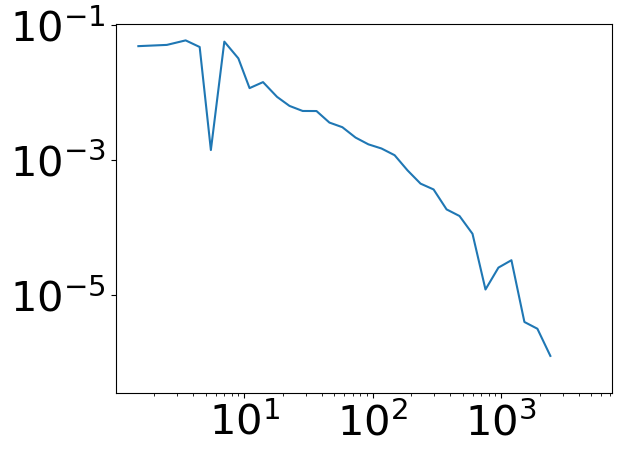

In [85]:
pwl.plot_pdf(intert1[10])

<Axes: >

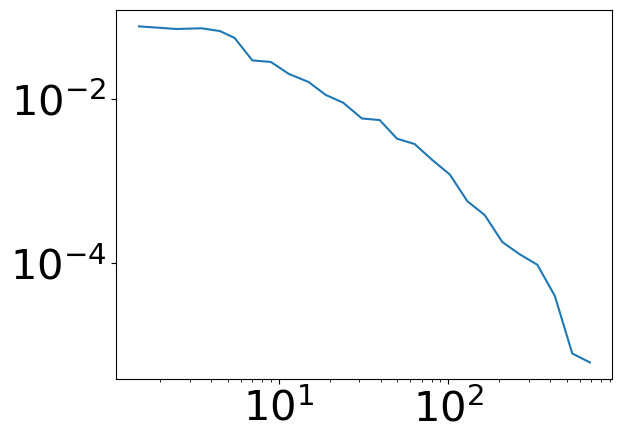

In [72]:
pwl.plot_pdf(arr1[0][-1])

In [52]:
plt.rcParams['font.size'] = 14

1


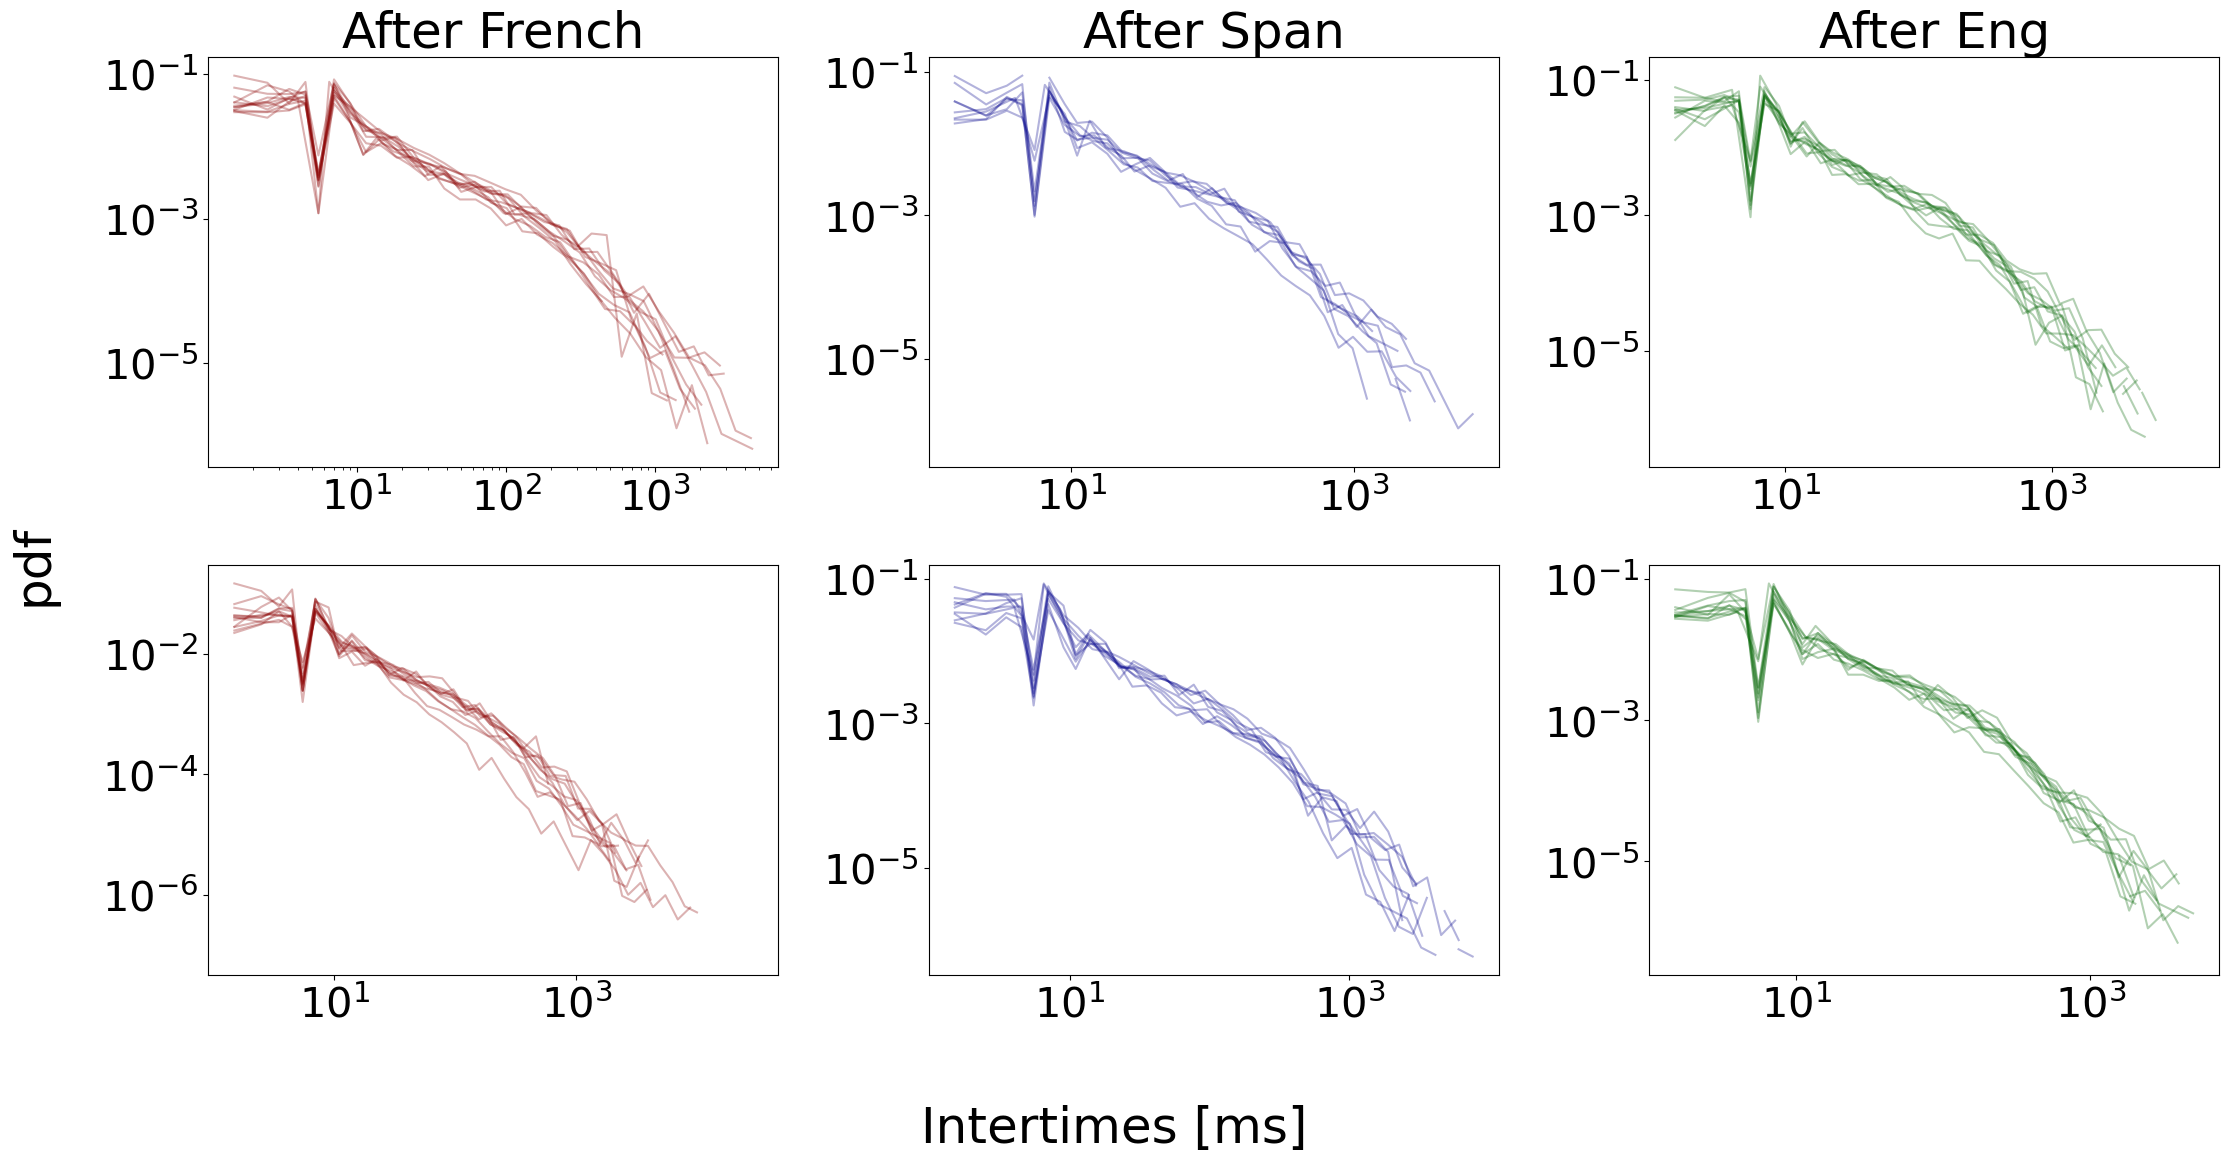

In [88]:
## thes = 3
time_in_sec = 8
interv =1
plt.rcParams['font.size'] = 30
fig = plt.figure(figsize = (23,12))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)



for j in range(arr1[0].shape[0]):
    pwl.plot_pdf(arr1[0][j],color ='darkred', alpha = .3, ax = ax1)
    #ax1.plot(lags,np.mean(arr1[0],0),color ='darkred', alpha = 1)

for j in range(arr1[1].shape[0]):
    try:
        pwl.plot_pdf(arr1[1][j],color ='darkblue', alpha = .3, ax = ax2)
    except:
        print(j)
        continue

    #ax2.plot(lags,np.mean(arr1[1],0),color ='darkblue', alpha = 1)

#ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
for j in range(arr1[2].shape[0]):
    pwl.plot_pdf(arr1[2][j],color ='darkgreen', alpha = .3, ax = ax3)
#ax3.set_yscale('log')
#ax3.set_xlim(0.01,time_in_sec)
#ax3.set_ylim(10**-2.5,1);
#ax3.plot(lags,np.mean(arr1[2],0),color ='darkgreen', alpha = 1)



#ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
for j in range(arr2[0].shape[0]):
    pwl.plot_pdf(arr2[0][j],color ='darkred', alpha = .3, ax = ax4)
#ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
for j in range(arr2[1].shape[0]):
    pwl.plot_pdf(arr2[1][j],color ='darkblue', alpha = .3, ax = ax5)
    
    

#ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
for j in range(arr2[2].shape[0]):
    pwl.plot_pdf(arr2[2][j],color ='darkgreen', alpha = .3, ax = ax6)





fig.supylabel('pdf')
fig.supxlabel('Intertimes [ms]')
ax1.set_title('After French')
ax2.set_title('After Span')
ax3.set_title('After Eng');
plt.tight_layout();

# Plots

In [91]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (14,8))
fig.suptitle('Silence 1 avalanches')
axs = fig.add_subplot(2,2,1)
axd = fig.add_subplot(2,2,2)
axsh = fig.add_subplot(2,2,3)
axdh = fig.add_subplot(2,2,4)
alphas = []

taus = []
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss[i]
    d = dd[i]*0.002
    data = s
    fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs, alpha = 0.3)
    #fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--', ax = axs)

    #axs.annotate("alpha= {}".format(round(exp,2)),[0.8,0.5])
    alphas.append(exp)
    data = d
    fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd, alpha = 0.3)
    taus.append(exp)
    #if i == 1: break



    totals += ss[i].tolist()
    totald += d.tolist()
    #i+=1

axs.set_xlabel(r'Avalanche sizes')
axs.set_ylabel(r'pdf')
#fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd, alpha = 0.6)
axd.set_xlabel(r'Avalanche lifetimes')
axd.set_ylabel(r'pdf')
#axd.annotate("alpha= {}

totals = np.asarray(totals)
totald = np.asarray(totald)

data = totals
fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
exp = fit.power_law.alpha
axs.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction',fontsize = 11)

pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs)
fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--',ax = axs)


data = totald
fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False,)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd)



axsh.hist(alphas, bins = 15, color = 'red', alpha = .5, density = True)
axsh.set_xlabel('Alphas')
axsh.set_ylabel('pdf')

axdh.hist(taus, bins = 15, color = 'green', alpha = .5, density = True)
axdh.set_xlabel('Taus')
axdh.set_ylabel('pdf')
        
plt.tight_layout()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001DE9AF1EC10> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x000001DEA35E3280> (for post_execute):



KeyboardInterrupt



In [ ]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (14,8))
fig.suptitle('Avalanches silence 2')
axs = fig.add_subplot(2,2,1)
axd = fig.add_subplot(2,2,2)
axsh = fig.add_subplot(2,2,3)
axdh = fig.add_subplot(2,2,4)
alphas = []

taus = []
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss2[i]
    d = dd2[i]*0.002
    data = s
    fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs, alpha = 0.3)
    alphas.append(exp)
    
    
    data = d
    fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd, alpha = 0.3)
    taus.append(exp)
    #if i == 1: break



    totals += ss2[i].tolist()
    totald += d.tolist()
    #i+=1


axs.set_xlabel(r'Avalanche sizes')
axs.set_ylabel(r'pdf')
axd.set_xlabel(r'Avalanche lifetimes')
axd.set_ylabel(r'pdf')
totals = np.asarray(totals)
totald = np.asarray(totald)

data = totals
fit = pwl.Fit(data,xmin =(1,100),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = value)
exp = fit.power_law.alpha
axs.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction',fontsize = 11)

pwl.plot_pdf(data,color = 'tab:red', marker = '.', ax = axs)
fit.power_law.plot_pdf(data,color = 'tab:red' ,linestyle = '--',ax = axs)


data = totald
fit = pwl.Fit(data,xmin =(0,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False,)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:green', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd)



axsh.hist(alphas, bins = 15, color = 'red', alpha = .5, density = True)
axsh.set_xlabel('Alphas')
axsh.set_ylabel('pdf')

axdh.hist(taus, bins = 15, color = 'green', alpha = .5, density = True)
axdh.set_xlabel('Taus')
axdh.set_ylabel('pdf')
        
plt.tight_layout()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.7705689678088465 +- 0.14625324407348936
Fit from of average size given duration points: delta =  1.1468833425116862 +- 0.014066422137369245
Calculating best minimal value for power law fit


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8600\3259361468.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.3820575842168463 +- 0.060659784793897366
Fit from of average size given duration points: delta =  1.1151103632895798 +- 0.009968587433676943
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.1330461766279267 +- 0.060884230361683306
Fit from of average size given duration points: delta =  1.046710971224702 +- 0.010235717459408484
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.197220002893126 +- 0.06441182695195072
Fit from of average size given duration points: delta =  1.0918422082181494 +- 0.01121270927388818
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.1907452855235066 +- 0.0590

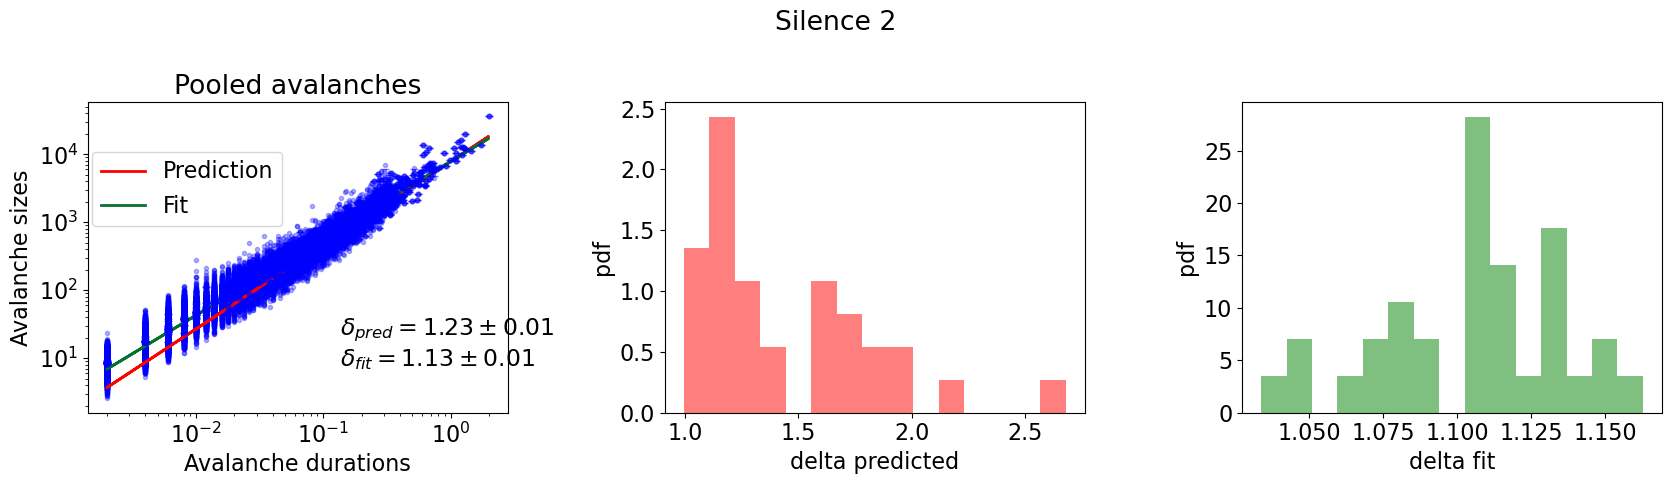

In [31]:

value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (17,5))
fig.suptitle('Silence 1')

axsd = fig.add_subplot(1,3,1)
axh1 = fig.add_subplot(1,3,2)
axh2 = fig.add_subplot(1,3,3)
#axdh = fig.add_subplot(2,2,4)
alphas = []

pred = []
fit =[]
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss[i]
    d = dd[i]*0.002
    
    v = scaling(s,d, ax = axsd)
    #axd.annotate("alpha= {}".format(round(exp,2)),[0.8,0.5])
    pred.append(v[0])
    fit.append(v[2])
    #if i == 1: break
    


    totals += ss[i].tolist()
    totald += d.tolist()
    #i+=1



totals = np.asarray(totals)
totald = np.asarray(totald)
v = scaling(totals,totald, ax = axsd, plotto = True)
#axsd.set_ylim(10**2.5, 10**5)
axsd.set_title('Pooled avalanches')


    
axh1.hist(pred, bins = 15, color = 'red', alpha = .5, density = True)
axh1.set_xlabel('delta predicted')
axh1.set_ylabel('pdf')

axh2.hist(fit, bins = 15, color = 'green', alpha = .5, density = True)
axh2.set_xlabel('delta fit')
axh2.set_ylabel('pdf')

plt.tight_layout()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.1717075899000882 +- 0.07710632852344296
Fit from of average size given duration points: delta =  1.1453976151520244 +- 0.011762773968597698
Calculating best minimal value for power law fit


C:\Users\Benedetta\AppData\Local\Temp\ipykernel_8600\3259361468.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([pred, errpred,fit,errfit,a,b,c])


Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  2.3927457183218688 +- 0.16057189718716341
Fit from of average size given duration points: delta =  1.1360553306374963 +- 0.010002216549032236
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.0734530718383493 +- 0.05829521353600677
Fit from of average size given duration points: delta =  1.1241066198295027 +- 0.010687345836283663
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  1.2671606374125164 +- 0.0814346650222497
Fit from of average size given duration points: delta =  1.119489059580511 +- 0.01134335818660616
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Prediction from crackling noise relation: delta =  0.9684765591798146 +- 0.064167

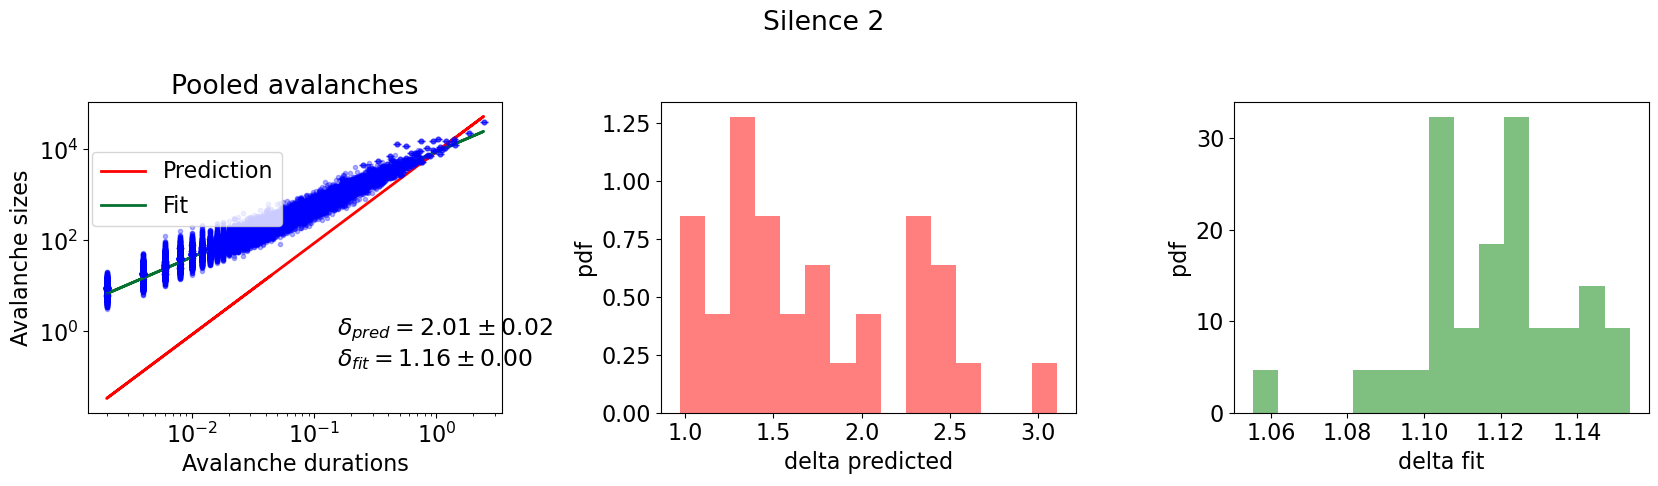

In [30]:

value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (17,5))
fig.suptitle('Silence 2')

axsd = fig.add_subplot(1,3,1)
axh1 = fig.add_subplot(1,3,2)
axh2 = fig.add_subplot(1,3,3)
#axdh = fig.add_subplot(2,2,4)
alphas = []

pred = []
fit =[]
totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(ss)):

    s = ss2[i]
    d = dd2[i]*0.002
    
    v = scaling(s,d, ax = axsd)
    #axd.annotate("alpha= {}".format(round(exp,2)),[0.8,0.5])
    pred.append(v[0])
    fit.append(v[2])
    #if i == 1: break
    


    totals += ss2[i].tolist()
    totald += d.tolist()
    #i+=1



totals = np.asarray(totals)
totald = np.asarray(totald)
v = scaling(totals,totald, ax = axsd, plotto = True)
#axsd.set_ylim(10**2.5, 10**5)
axsd.set_title('Pooled avalanches')


    
axh1.hist(pred, bins = 15, color = 'red', alpha = .5, density = True)
axh1.set_xlabel('delta predicted')
axh1.set_ylabel('pdf')

axh2.hist(fit, bins = 15, color = 'green', alpha = .5, density = True)
axh2.set_xlabel('delta fit')
axh2.set_ylabel('pdf')

plt.tight_layout()

In [34]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *

overlap =0.5
bands = [[1,3],[4,8],[8,13],[14,30],[31,60]]
labels = ['band-1', 'band-2', 'band-3', 'band-4', 'band-5']
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
print(len(subjs))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
int1 = []
int2 = []



ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
def find_bad_channels(data, MAX_PEAK=200, MAX_PEAK_SIGMA=15, MAX_DIST_PS=4.5e-3, OFFSET=30, fmin=1, fmax=100, 
                      verbose = True):
    idx_down, idx_up = 0, data.shape[1]
    ss = np.std(data)
    
    psds, freqs = mne.time_frequency.psd_welch(mne.io.RawArray(data/1e6, info, verbose=False), fmin=fmin, fmax=fmax, n_fft=2048, n_overlap=1024/2, verbose=False)
    psds = np.log10(psds)
    
    dist = [((tmp-psds.mean(axis=0))**2).sum() for tmp in psds]
    dist = np.array(dist) / (psds**2).sum() * 1e2
    
    rej = []
    for i, ch in enumerate(ch_names):
        delta = np.abs(data[i]).max()
    
        str_rej = str()

        if delta>MAX_PEAK or dist[i]>MAX_DIST_PS:
            rej.append(ch)
            str_rej = '-> rejected'
            str_rej += ' ('
            if delta>MAX_PEAK:
                str_rej += ' peak'
                idx = np.where(np.abs(data[i])>MAX_PEAK)[0]
            
            if dist[i]>MAX_DIST_PS:
                str_rej += ' ps'
            str_rej += ')'
            
        if verbose: print(f'* {ch}: max peak = {np.round(delta, 2)} mV ({np.round(delta/ss, 2)} std); dist ps = {np.round(dist[i],3)} '+str_rej)
        
        if delta>MAX_PEAK:
            if np.max(idx)/sfreq<OFFSET:
                idx_down = np.max([np.max(idx),idx_down])
                if verbose: print(f'[*] WARNING: Peak only in the initial part - time: {np.max(idx)/sfreq} s')
            if np.min(idx)/sfreq>180-OFFSET:
                idx_up = np.min([np.min(idx),idx_up])
                if verbose: print(f'[*] WARNING: Peak only in the last part - time: {np.min(idx)/sfreq} s')
    if verbose: print('\nBad channels:', rej, '\n')
    return rej, idx_down, idx_up




o = 0
for i, subj in enumerate(subjs):
    print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    print(nchan, nchan2)
    if nchan >= 5 and nchan2 >=5:
        
        
        print('doing')
        d = intertimes(data.T,2)
        d2 = intertimes(data2.T,2)

        int1.append(d)

        int2.append(d2)
        o += 1
        

49


########## SUBJ 5 (1/49)##########
7 10
doing


########## SUBJ 6 (2/49)##########
10 10
doing


########## SUBJ 9 (3/49)##########
9 10
doing


########## SUBJ 11 (4/49)##########
10 10
doing


########## SUBJ 12 (5/49)##########
10 7
doing


########## SUBJ 13 (6/49)##########
0 8


########## SUBJ 16 (7/49)##########
9 10
doing


########## SUBJ 17 (8/49)##########
10 10
doing


########## SUBJ 18 (9/49)##########
8 9
doing


########## SUBJ 19 (10/49)##########
9 10
doing


########## SUBJ 21 (11/49)##########
9 1


########## SUBJ 23 (12/49)##########
8 10
doing


########## SUBJ 24 (13/49)##########
0 10


########## SUBJ 25 (14/49)##########
2 10


########## SUBJ 30 (15/49)##########
10 8
doing


########## SUBJ 33 (16/49)##########
7 9
doing


########## SUBJ 34 (17/49)##########
0 10


########## SUBJ 35 (18/49)##########
9 10
doing


########## SUBJ 37 (19/49)##########
10 10
doing


########## SUBJ 39 (20/49)##########
4 9


########## SUBJ 40 (21/49)##########
6 8
doi

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less tha

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
Not enough data. Returning nan
Less tha

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

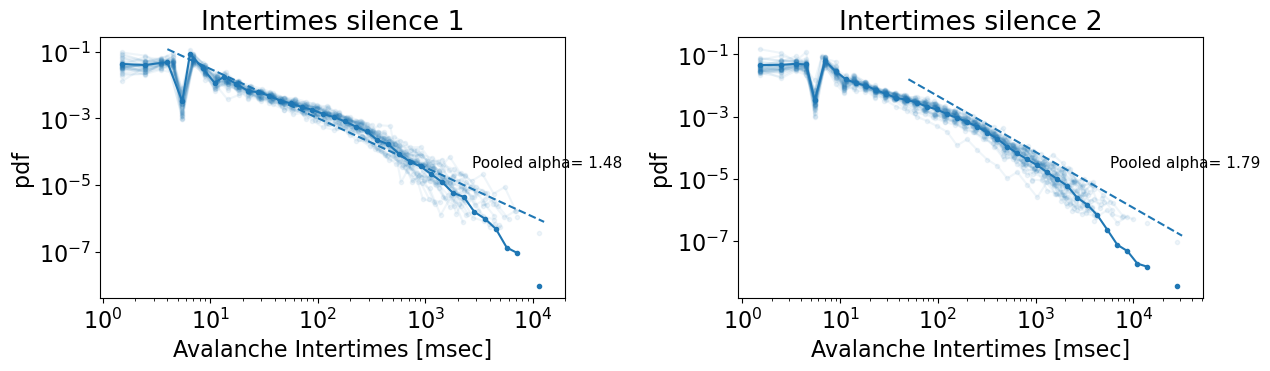

In [41]:
value = False

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
axd = fig.add_subplot(1,2,1)
axd2 = fig.add_subplot(1,2,2)

#axd = fig.add_subplot(,2,2)
#axsh = fig.add_subplot(2,2,3)
#axdh = fig.add_subplot(2,2,4)
#alphas = []

taus = []
#totals = []
totald  =[]

#os.chdir('../../../Downloads/avalanches_in_silences/avalanches_silence1/')
for i in range(len(int1)):

    #s = ss[i]
    d = int1[i] 
    data = d*2
    fit = pwl.Fit(data,xmin = (0.,0.05),xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    try:
        pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd, alpha = 0.07, linear_bins = False)
    except:
        continue
    #fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd, alpha = 0.6)

    

  
    #totals += ss[i].tolist()
    totald += data.tolist()
    #i+=1
totald2 = []
for i in range(len(int2)):
    
    #s = ss[i]
    d = int2[i] 
    data = d*2
    fit = pwl.Fit(data,xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
    exp = fit.power_law.alpha
    try:
        pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd2, alpha = 0.07, linear_bins = False)
        #fit.power_law.plot_pdf(data,color = 'tab:green' ,linestyle = '--', ax = axd, alpha = 0.6)
    except:
        continue

    
    
    #totals += ss[i].tolist()
    totald2 += data.tolist()
    #i+=1

axd.set_xlabel(r'Avalanche Intertimes [msec]')
axd.set_ylabel(r'pdf')

axd2.set_xlabel(r'Avalanche Intertimes [msec]')
axd2.set_ylabel(r'pdf')
axd.set_title('Intertimes silence 1')

axd2.set_title('Intertimes silence 2')

#totals = np.asarray(totals)
totald = np.asarray(totald)
#total2d = np.asarray(totald2)


data = totald
fit = pwl.Fit(data,xmin = (0.,50), xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
exp = fit.power_law.alpha
axd.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd)
fit.power_law.plot_pdf(data,color = 'tab:blue' ,linestyle = '--', ax = axd)





#totals = np.asarray(totals)
totald2 = np.asarray(totald2)

data = totald2
fit = pwl.Fit(data,xmin = (0.,50), xmax= max(data),parameter_range= {"alpha":[1,4]},discrete = False)
exp = fit.power_law.alpha
axd2.annotate("Pooled alpha= {}".format(round(exp,2)),[0.8,0.5], xycoords = 'axes fraction', fontsize = 11)
pwl.plot_pdf(data,color = 'tab:blue', marker = '.', ax = axd2)
fit.power_law.plot_pdf(data,color = 'tab:blue' ,linestyle = '--', ax = axd2)
## check duratio
        
plt.tight_layout()